#IMPORTING LIBRARIES

In [437]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#uploading files to colab notebook

In [438]:
from google.colab import files
uploaded=files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity (2).csv


In [439]:
data=pd.read_csv('/content/garments_worker_productivity (1).csv')
data

date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     NaN        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     NaN        960          0        0.0         0   
1193   3.90     NaN        960          0        0.0         0   
1194   3.90     NaN        960          0        0.0         0   
1195   2.90     NaN       1800          0        0.0         0   
1196   2.90     NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
0                      0           59.0             0.940725  
1                      0            8.0             0.886500  
2                      0           30.5             0.800570  
3                      0           30.5             0.800570  
4                      0           56.0             0.800382  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[1197 rows x 15 columns]

#DATA PREPROCESSING

In [440]:
data_types = data.dtypes

In [441]:
categorical_vars = data_types[data_types == 'object'].index.tolist()  # For object type (usually strings)
continuous_vars = data.select_dtypes(include=['number']).columns.tolist()  # For numerical types (int, float)

# Print the lists
print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['date', 'quarter', 'department', 'day']
Continuous Variables: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']


In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [443]:
def convert_day_to_binary(day):
    if day in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0

In [444]:
data['day_binary'] = data['day'].apply(convert_day_to_binary)

In [445]:
data.drop('day', axis=1, inplace=True)

In [446]:
data.drop('date', axis=1, inplace=True)

In [447]:
data

quarter  department  team  targeted_productivity    smv     wip  \
0     Quarter1      sweing     8                   0.80  26.16  1108.0   
1     Quarter1  finishing      1                   0.75   3.94     NaN   
2     Quarter1      sweing    11                   0.80  11.41   968.0   
3     Quarter1      sweing    12                   0.80  11.41   968.0   
4     Quarter1      sweing     6                   0.80  25.90  1170.0   
...        ...         ...   ...                    ...    ...     ...   
1192  Quarter2   finishing    10                   0.75   2.90     NaN   
1193  Quarter2   finishing     8                   0.70   3.90     NaN   
1194  Quarter2   finishing     7                   0.65   3.90     NaN   
1195  Quarter2   finishing     9                   0.75   2.90     NaN   
1196  Quarter2   finishing     6                   0.70   2.90     NaN   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0          7080         98        0.0         0                   0   
1           960          0        0.0         0                   0   
2          3660         50        0.0         0                   0   
3          3660         50        0.0         0                   0   
4          1920         50        0.0         0                   0   
...         ...        ...        ...       ...                 ...   
1192        960          0        0.0         0                   0   
1193        960          0        0.0         0                   0   
1194        960          0        0.0         0                   0   
1195       1800          0        0.0         0                   0   
1196        720          0        0.0         0                   0   

      no_of_workers  actual_productivity  day_binary  
0              59.0             0.940725           0  
1               8.0             0.886500           0  
2              30.5             0.800570           0  
3              30.5             0.800570           0  
4              56.0             0.800382           0  
...             ...                  ...         ...  
1192            8.0             0.628333           0  
1193            8.0             0.625625           0  
1194            8.0             0.625625           0  
1195           15.0             0.505889           0  
1196            6.0             0.394722           0  

[1197 rows x 14 columns]

checking null values

In [448]:
data.isna().sum()

quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
day_binary                 0
dtype: int64

removing the column 'wip' since the null values are more

In [449]:
data.drop('wip', axis=1, inplace=True)

In [450]:
data.head()

quarter  department  team  targeted_productivity    smv  over_time  \
0  Quarter1      sweing     8                   0.80  26.16       7080   
1  Quarter1  finishing      1                   0.75   3.94        960   
2  Quarter1      sweing    11                   0.80  11.41       3660   
3  Quarter1      sweing    12                   0.80  11.41       3660   
4  Quarter1      sweing     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  day_binary  
0             0.940725           0  
1             0.886500           0  
2             0.800570           0  
3             0.800570           0  
4             0.800382           0

In [451]:
data.isna().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
day_binary               0
dtype: int64

In [452]:
data.shape

(1197, 13)

In [453]:
data.shape[1]

13

In [454]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


finding out unique values for each column and counting them

In [455]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64
['sweing' 'finishing ' 'finishing']
department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
[ 8  1 11 12  6  7  2  3  9 10  5  4]
team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64
[0.8  0.75 0.7  0.65 0.6  0.35 0.5  0.07 0.4 ]
targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64
[26.16  3.94 11.41 25.9  28.08 19.87 19.31  2.9  23.69  4.15 11.61 45.67
 21.98 31.83 12.52 42.41 20.79 50.48  4.3  22.4  42.27 27.13 14.61 51.02
 22.52 14.89 22.94 48.68 41.19 48.84 26.87 20.4  49.1  15.26 54.56 40.99
 29.12  4.08 42.97 15.09 30.4  48.18 20.1  38.09 18.79 23.54 50.89 24.26
 20.55 30.1  25.31

Assaigning feature variables and target variables

In [456]:
# Feature Variable
x=data.drop(['actual_productivity'],axis=1)
print(x)

# Target Variable
y=data['actual_productivity']
print(y)

       quarter  department  team  targeted_productivity    smv  over_time  \
0     Quarter1      sweing     8                   0.80  26.16       7080   
1     Quarter1  finishing      1                   0.75   3.94        960   
2     Quarter1      sweing    11                   0.80  11.41       3660   
3     Quarter1      sweing    12                   0.80  11.41       3660   
4     Quarter1      sweing     6                   0.80  25.90       1920   
...        ...         ...   ...                    ...    ...        ...   
1192  Quarter2   finishing    10                   0.75   2.90        960   
1193  Quarter2   finishing     8                   0.70   3.90        960   
1194  Quarter2   finishing     7                   0.65   3.90        960   
1195  Quarter2   finishing     9                   0.75   2.90       1800   
1196  Quarter2   finishing     6                   0.70   2.90        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \


#EXPLORATORY DATA ANALYSIS

Comparing Actual productivity and targeted productivity for attributes

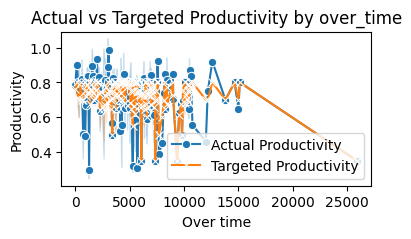

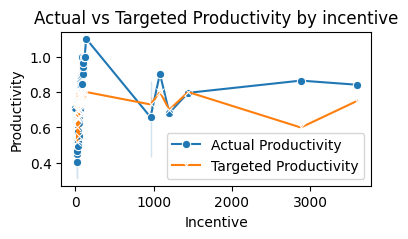

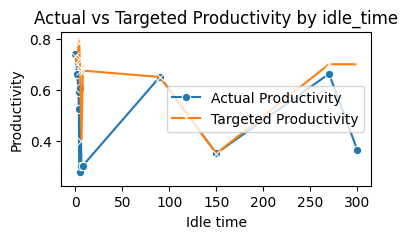

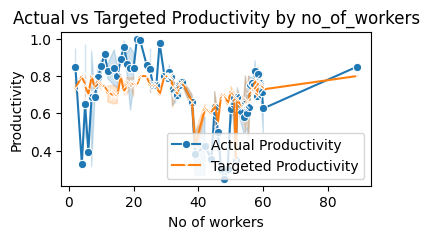

In [457]:
attributes = ['over_time', 'incentive', 'idle_time', 'no_of_workers']

for column in attributes:
    plt.figure(figsize=(4,2))

    sns.lineplot(x=column, y='actual_productivity', data=data, label='Actual Productivity', marker='o')

    sns.lineplot(x=column, y='targeted_productivity', data=data, label='Targeted Productivity', marker='x')

    plt.title(f'Actual vs Targeted Productivity by {column}')
    plt.xlabel(column.capitalize().replace('_', ' '))
    plt.ylabel('Productivity')
    plt.legend()

    plt.show()

Analysis of Standard Minute value(SMV) based on each attribute

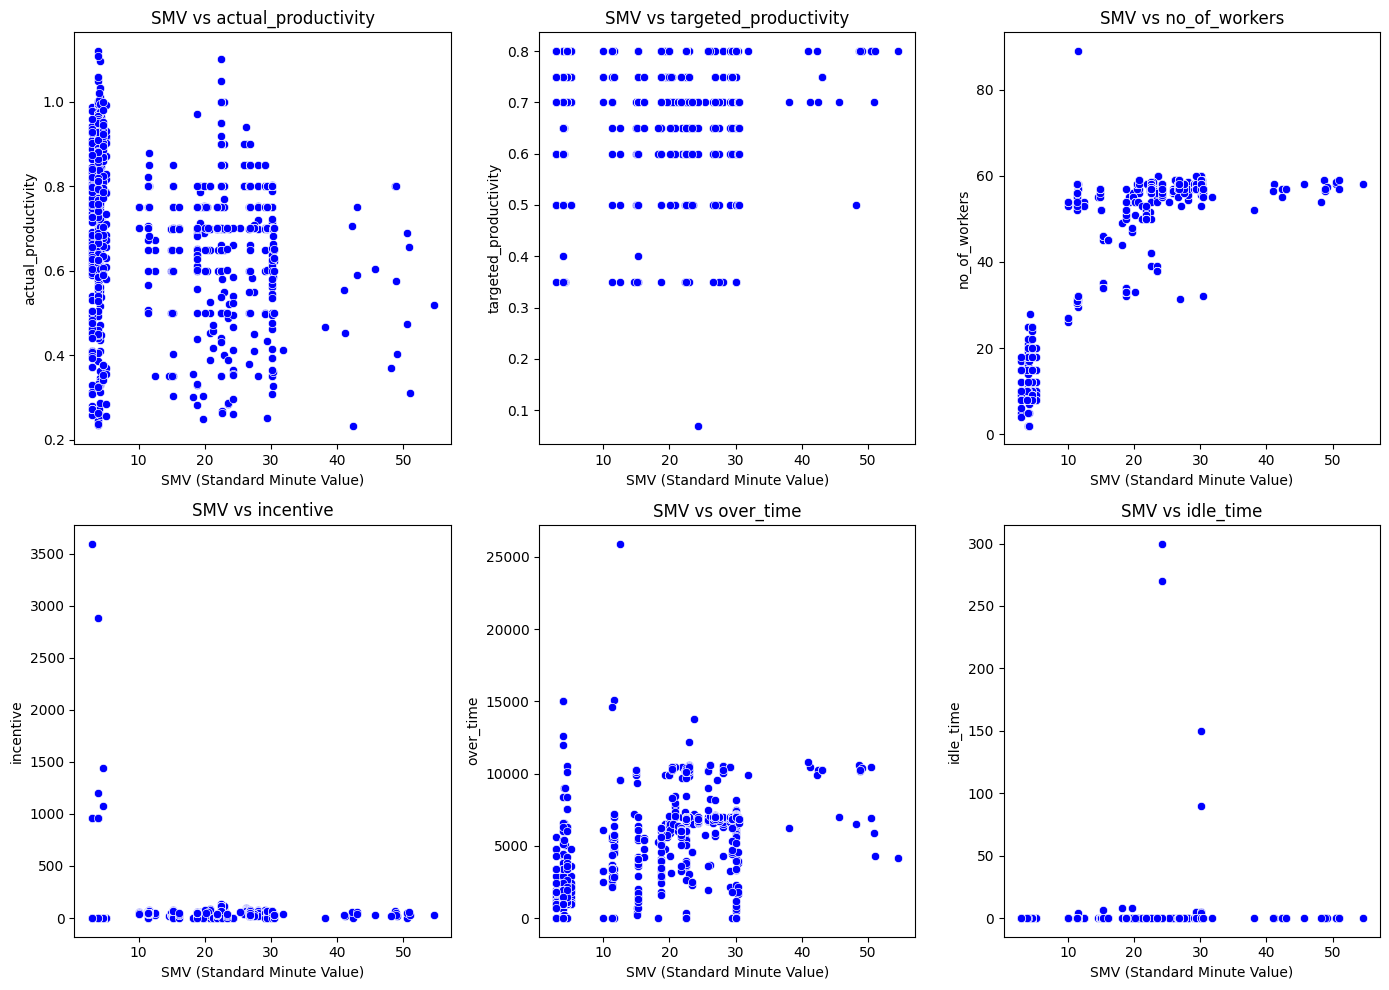

In [458]:
variables = ['actual_productivity', 'targeted_productivity', 'no_of_workers',
             'incentive', 'over_time', 'idle_time']

plt.figure(figsize=(14, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='smv', y=var, data=data, marker='o', color='blue')
    plt.title(f'SMV vs {var}')
    plt.xlabel('SMV (Standard Minute Value)')
    plt.ylabel(var)


plt.tight_layout()
plt.show()

In [459]:
corr_matrix = data.corr(numeric_only=True)

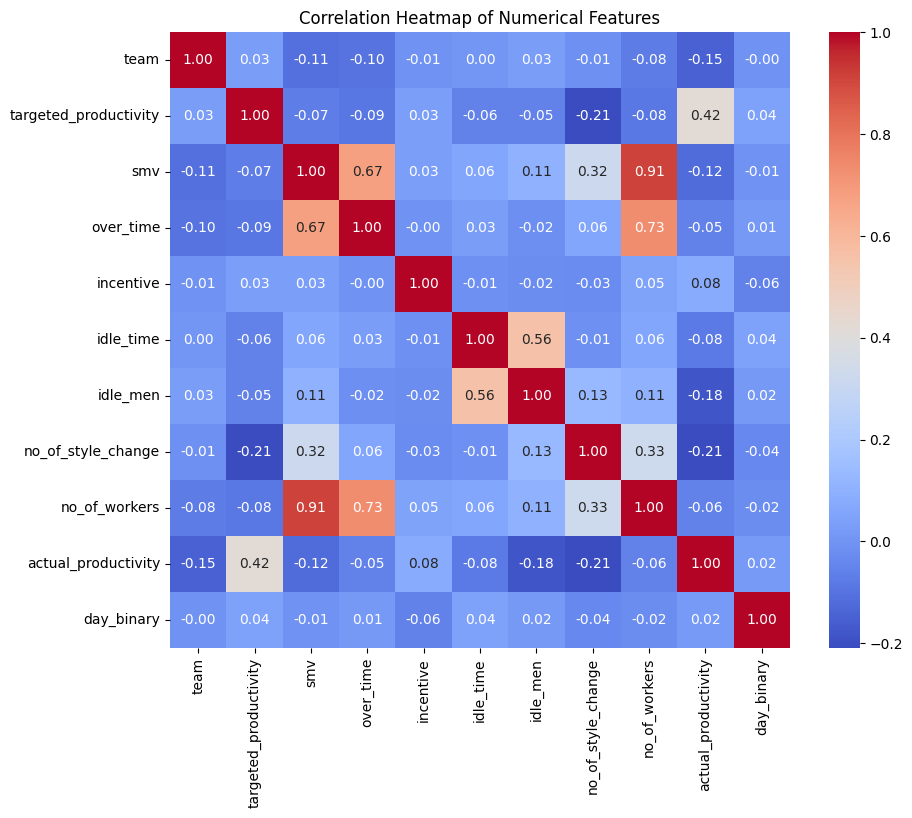

In [460]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

scatter plot (overtime vs no of workers)

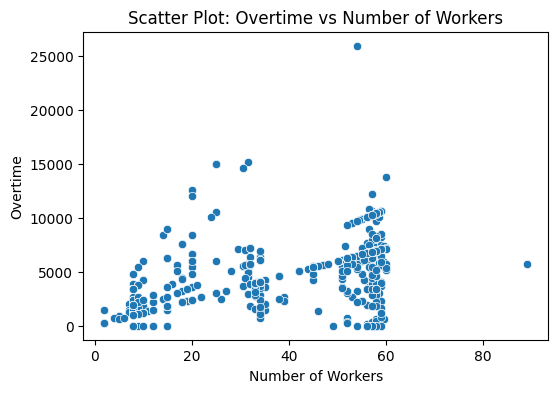

In [461]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x='no_of_workers', y='over_time', data=data)

plt.title('Scatter Plot: Overtime vs Number of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Overtime')


plt.show()

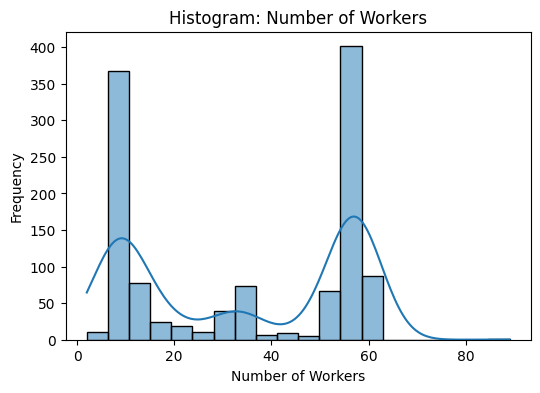

In [462]:
plt.figure(figsize=(6, 4))

# Creating a histogram for 'no_of_workers'
sns.histplot(data['no_of_workers'], bins=20, kde=True)

plt.title('Histogram: Number of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')

plt.show()

scatter plot (no of workers vs actual productiviy)

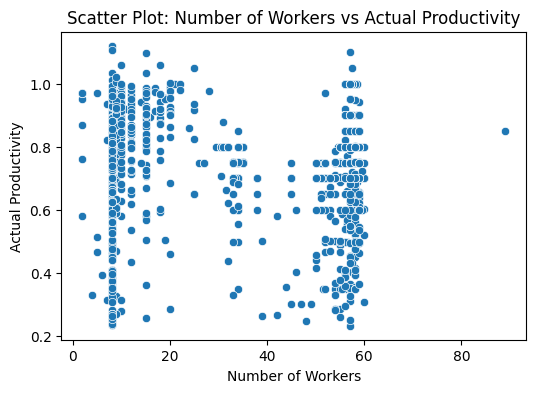

In [463]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x='no_of_workers', y='actual_productivity', data=data)


plt.title('Scatter Plot: Number of Workers vs Actual Productivity')
plt.xlabel('Number of Workers')
plt.ylabel('Actual Productivity')

plt.show()

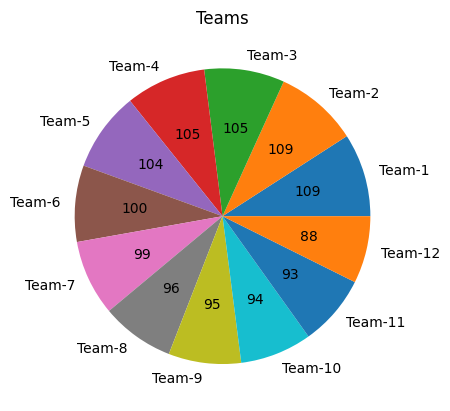

In [464]:
teams = data['team']
sizes = teams.value_counts()

# Custom function to display counts instead of percentages
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f'{absolute}'

plt.pie(sizes, labels=["Team-1", "Team-2", "Team-3", "Team-4", "Team-5", "Team-6", "Team-7", "Team-8", "Team-9", "Team-10", "Team-11", "Team-12"],
        autopct=lambda pct: autopct_format(pct, sizes))
plt.title('Teams')
plt.show()

pie chart for teams

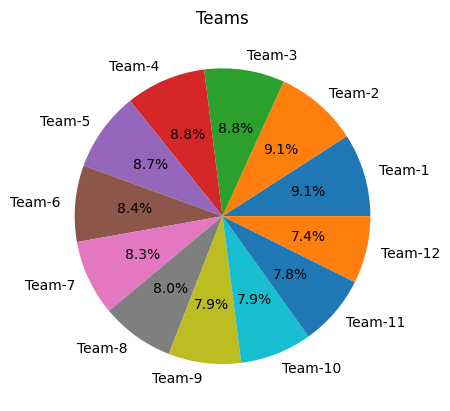

In [465]:
teams=data['team']
sizes=teams.value_counts()
plt.pie(sizes,labels=["Team-1","Team-2","Team-3","Team-4","Team-5","Team-6","Team-7","Team-8","Team-9","Team-10","Team-11","Team-12"],autopct='%1.1f%%')
plt.title('Teams')
plt.show()

bar plot (Department column)

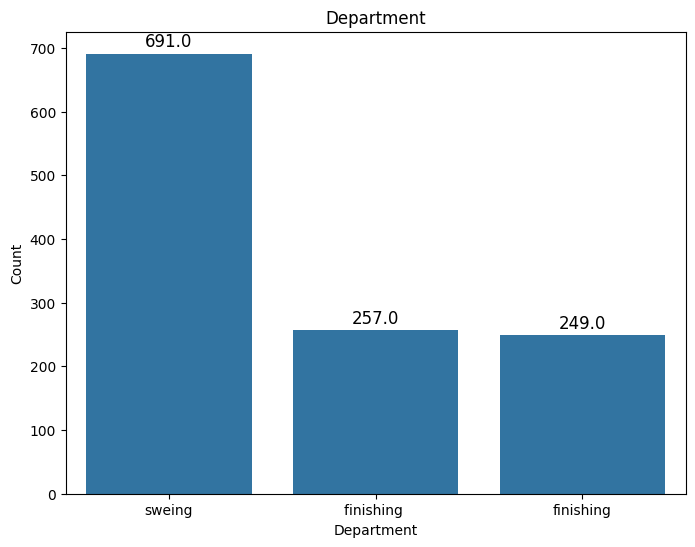

In [466]:
plt.figure(figsize=(8, 6))

bar_plot = sns.countplot(x='department', data=data)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),textcoords='offset points')

plt.title('Department')
plt.xlabel('Department')
plt.ylabel('Count')

plt.show()

Bar plot (Quarter column)

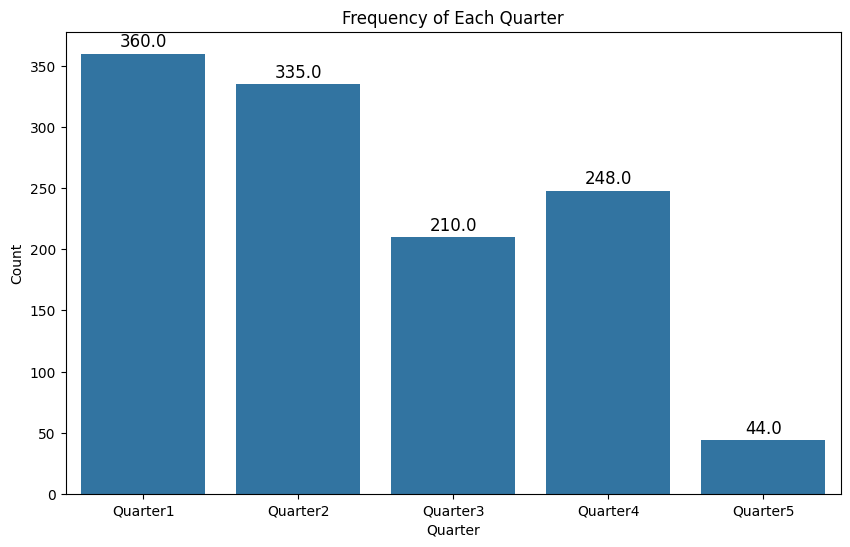

In [467]:
plt.figure(figsize=(10, 6))

bar_plot = sns.countplot(x='quarter', data=data)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),textcoords='offset points')


plt.title('Frequency of Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')

plt.show()

#assaigning dummies

In [468]:
X= pd.get_dummies(data, drop_first=True)
X

team  targeted_productivity    smv  over_time  incentive  idle_time  \
0        8                   0.80  26.16       7080         98        0.0   
1        1                   0.75   3.94        960          0        0.0   
2       11                   0.80  11.41       3660         50        0.0   
3       12                   0.80  11.41       3660         50        0.0   
4        6                   0.80  25.90       1920         50        0.0   
...    ...                    ...    ...        ...        ...        ...   
1192    10                   0.75   2.90        960          0        0.0   
1193     8                   0.70   3.90        960          0        0.0   
1194     7                   0.65   3.90        960          0        0.0   
1195     9                   0.75   2.90       1800          0        0.0   
1196     6                   0.70   2.90        720          0        0.0   

      idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0            0                   0           59.0             0.940725   
1            0                   0            8.0             0.886500   
2            0                   0           30.5             0.800570   
3            0                   0           30.5             0.800570   
4            0                   0           56.0             0.800382   
...        ...                 ...            ...                  ...   
1192         0                   0            8.0             0.628333   
1193         0                   0            8.0             0.625625   
1194         0                   0            8.0             0.625625   
1195         0                   0           15.0             0.505889   
1196         0                   0            6.0             0.394722   

      day_binary  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
0              0             False             False             False   
1              0             False             False             False   
2              0             False             False             False   
3              0             False             False             False   
4              0             False             False             False   
...          ...               ...               ...               ...   
1192           0              True             False             False   
1193           0              True             False             False   
1194           0              True             False             False   
1195           0              True             False             False   
1196           0              True             False             False   

      quarter_Quarter5  department_finishing   department_sweing  
0                False                  False               True  
1                False                   True              False  
2                False                  False               True  
3                False                  False               True  
4                False                  False               True  
...                ...                    ...                ...  
1192             False                  False              False  
1193             False                  False              False  
1194             False                  False              False  
1195             False                  False              False  
1196             False                  False              False  

[1197 rows x 17 columns]

In [469]:
original_columns = data.columns.tolist()
original_columns

['quarter',
 'department',
 'team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'day_binary']

In [470]:
dummy_columns = X.columns.tolist()

In [471]:
changed_columns = list(set(dummy_columns) - set(original_columns))
print("Changed Columns:", changed_columns)

Changed Columns: ['quarter_Quarter2', 'quarter_Quarter4', 'department_finishing ', 'quarter_Quarter5', 'department_sweing', 'quarter_Quarter3']


In [472]:
data

quarter  department  team  targeted_productivity    smv  over_time  \
0     Quarter1      sweing     8                   0.80  26.16       7080   
1     Quarter1  finishing      1                   0.75   3.94        960   
2     Quarter1      sweing    11                   0.80  11.41       3660   
3     Quarter1      sweing    12                   0.80  11.41       3660   
4     Quarter1      sweing     6                   0.80  25.90       1920   
...        ...         ...   ...                    ...    ...        ...   
1192  Quarter2   finishing    10                   0.75   2.90        960   
1193  Quarter2   finishing     8                   0.70   3.90        960   
1194  Quarter2   finishing     7                   0.65   3.90        960   
1195  Quarter2   finishing     9                   0.75   2.90       1800   
1196  Quarter2   finishing     6                   0.70   2.90        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0.0         0                   0           59.0   
1             0        0.0         0                   0            8.0   
2            50        0.0         0                   0           30.5   
3            50        0.0         0                   0           30.5   
4            50        0.0         0                   0           56.0   
...         ...        ...       ...                 ...            ...   
1192          0        0.0         0                   0            8.0   
1193          0        0.0         0                   0            8.0   
1194          0        0.0         0                   0            8.0   
1195          0        0.0         0                   0           15.0   
1196          0        0.0         0                   0            6.0   

      actual_productivity  day_binary  
0                0.940725           0  
1                0.886500           0  
2                0.800570           0  
3                0.800570           0  
4                0.800382           0  
...                   ...         ...  
1192             0.628333           0  
1193             0.625625           0  
1194             0.625625           0  
1195             0.505889           0  
1196             0.394722           0  

[1197 rows x 13 columns]

converting boolean into binary

In [473]:
columns = ['quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_sweing', 'department_finishing ']
X[columns] = X[columns].astype(int)
print(X.head())

   team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0         0                   0           59.0             0.940725   
1         0                   0            8.0             0.886500   
2         0                   0           30.5             0.800570   
3         0                   0           30.5             0.800570   
4         0                   0           56.0             0.800382   

   day_binary  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
0           0                 0                 0        

In [474]:
data=X
data

team  targeted_productivity    smv  over_time  incentive  idle_time  \
0        8                   0.80  26.16       7080         98        0.0   
1        1                   0.75   3.94        960          0        0.0   
2       11                   0.80  11.41       3660         50        0.0   
3       12                   0.80  11.41       3660         50        0.0   
4        6                   0.80  25.90       1920         50        0.0   
...    ...                    ...    ...        ...        ...        ...   
1192    10                   0.75   2.90        960          0        0.0   
1193     8                   0.70   3.90        960          0        0.0   
1194     7                   0.65   3.90        960          0        0.0   
1195     9                   0.75   2.90       1800          0        0.0   
1196     6                   0.70   2.90        720          0        0.0   

      idle_men  no_of_style_change  no_of_workers  actual_productivity  \
0            0                   0           59.0             0.940725   
1            0                   0            8.0             0.886500   
2            0                   0           30.5             0.800570   
3            0                   0           30.5             0.800570   
4            0                   0           56.0             0.800382   
...        ...                 ...            ...                  ...   
1192         0                   0            8.0             0.628333   
1193         0                   0            8.0             0.625625   
1194         0                   0            8.0             0.625625   
1195         0                   0           15.0             0.505889   
1196         0                   0            6.0             0.394722   

      day_binary  quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   
2              0                 0                 0                 0   
3              0                 0                 0                 0   
4              0                 0                 0                 0   
...          ...               ...               ...               ...   
1192           0                 1                 0                 0   
1193           0                 1                 0                 0   
1194           0                 1                 0                 0   
1195           0                 1                 0                 0   
1196           0                 1                 0                 0   

      quarter_Quarter5  department_finishing   department_sweing  
0                    0                      0                  1  
1                    0                      1                  0  
2                    0                      0                  1  
3                    0                      0                  1  
4                    0                      0                  1  
...                ...                    ...                ...  
1192                 0                      0                  0  
1193                 0                      0                  0  
1194                 0                      0                  0  
1195                 0                      0                  0  
1196                 0                      0                  0  

[1197 rows x 17 columns]

#Regression Analysis befor multicollinearity checking

In [475]:
columns = ['team','targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','day_binary','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','department_finishing ','department_finishing ','department_sweing']
X = data[columns]
y = data.actual_productivity

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

0.2447468047993604
[-8.11913887e-03  7.04627732e-01 -6.89494584e-03 -4.17247498e-06
  6.04241502e-05  4.15437317e-04 -8.53816664e-03 -4.23480133e-02
  4.72049871e-03 -1.38450038e-03  3.19073361e-03 -1.43194079e-02
 -9.29530113e-03  7.88205701e-02  2.45480233e-02  2.45480233e-02
 -2.52789150e-02]


In [476]:
X = data[['team','targeted_productivity','smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','day_binary','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','department_finishing ','department_sweing']]
y = data.actual_productivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16094059089374732


In [477]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.20,train_size=0.80)
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.25,train_size=0.75)
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.30,train_size=0.70)
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.40,train_size=0.60)

80-20 SPLIT

In [478]:
lm2 = LinearRegression()
lm2.fit(X_train1, y_train1)
y_pred = lm2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

0.16495932805877847


In [479]:
r2_score(y_test1,y_pred)

0.12137791112679319

In [480]:
metrics.mean_absolute_error(y_test1,y_pred)

0.11989662209467707

75-25 SPLIT

In [481]:
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))

0.19418903841629018


In [482]:
r2_score(y_test2,y_pred)

-0.3718821244697985

In [483]:
metrics.mean_absolute_error(y_test2,y_pred)

0.1500289535402637

70-30 SPLIT

In [484]:
lm2 = LinearRegression()
lm2.fit(X_train3, y_train3)
y_pred = lm2.predict(X_test3)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))

0.14828193109728977


In [485]:
r2_score(y_test3,y_pred)

0.2239194615100123

In [486]:
metrics.mean_absolute_error(y_test3,y_pred)

0.10809915714156165

60-40 SPLIT

In [487]:
lm2 = LinearRegression()
lm2.fit(X_train4, y_train4)
y_pred = lm2.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred)))

0.14880426297006924


In [488]:
r2_score(y_test4,y_pred)

0.1911554616702742

In [489]:
metrics.mean_absolute_error(y_test4,y_pred)

0.10598275847540725

#KNN before MULTICOLLINEARITY checking

In [490]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [491]:
model=KNeighborsRegressor(n_neighbors=20)

80 - 20 SPLIT

In [492]:
model.fit(X_train1,y_train1)

KNeighborsRegressor(n_neighbors=20)

In [493]:
y_pred1=model.predict(X_test1)
y_pred1

array([0.77700859, 0.82207474, 0.81721389, 0.79519851, 0.82071524,
       0.73103818, 0.76932883, 0.79789603, 0.74099763, 0.76998867,
       0.70227875, 0.7436055 , 0.73999244, 0.74539703, 0.71403281,
       0.81013929, 0.79129518, 0.80522752, 0.79046114, 0.68530767,
       0.64007083, 0.84909337, 0.63151875, 0.72877486, 0.73080731,
       0.78873293, 0.81936667, 0.68578203, 0.6977933 , 0.68672822,
       0.63671728, 0.78603479, 0.84243792, 0.71101369, 0.55341942,
       0.76410749, 0.81520429, 0.66844712, 0.85541708, 0.86277636,
       0.84683125, 0.73600208, 0.82291572, 0.71101369, 0.67854641,
       0.78593316, 0.70489401, 0.85135059, 0.79789603, 0.81673835,
       0.78597613, 0.81013929, 0.69274195, 0.78786675, 0.74424596,
       0.67982109, 0.75700458, 0.79789603, 0.83538432, 0.70124115,
       0.71093003, 0.79941044, 0.68578203, 0.60655076, 0.55341942,
       0.80508266, 0.75700458, 0.72582796, 0.81013929, 0.72096874,
       0.81013929, 0.81857385, 0.97774561, 0.78185689, 0.51649

In [494]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted    Actual
1068   0.777009  0.980985
120    0.822075  0.800000
571    0.817214  0.740444
345    0.795199  0.728303
917    0.820715  0.700257
...         ...       ...
799    0.781857  0.565972
438    0.721709  0.997792
777    0.764478  0.650224
738    0.851351  0.664875
39     0.693885  0.625313

[240 rows x 2 columns]

In [495]:
r2_score(y_test1,y_pred1)

0.25352053398832075

In [496]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.11027368357458332

In [497]:
mean_squared_error(y_test1,y_pred1)

0.023119024550465588

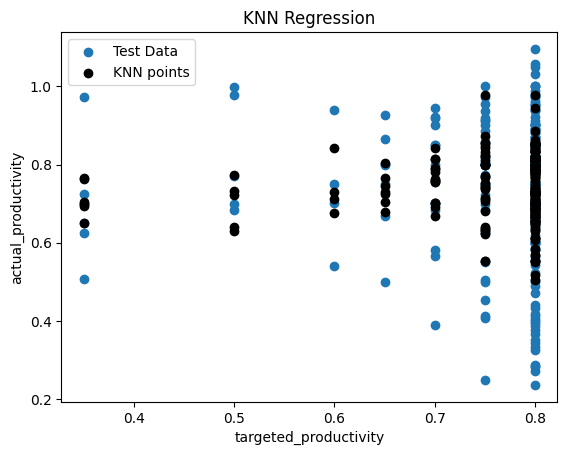

In [498]:
plt.scatter(data['targeted_productivity'][:len(y_test1)], y_test1, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred1)], y_pred1, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

75 - 25 SPLIT

In [499]:
model.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=20)

In [500]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0.83220627, 0.75871555, 0.77182061, 0.77798226, 0.8266625 ,
       0.6337375 , 0.74306011, 0.52855241, 0.82893101, 0.71058037,
       0.67819033, 0.55604763, 0.57481114, 0.82802324, 0.84682944,
       0.7185607 , 0.82779969, 0.5396288 , 0.75127292, 0.70889015,
       0.80986101, 0.7638832 , 0.62044271, 0.76330353, 0.81857833,
       0.727642  , 0.63350643, 0.76783848, 0.82770485, 0.72388443,
       0.73486373, 0.84682944, 0.65790201, 0.71228592, 0.66615375,
       0.70571511, 0.8803033 , 0.71762872, 0.80871681, 0.79015859,
       0.83035636, 0.81519389, 0.825145  , 0.69869714, 0.60259063,
       0.81884633, 0.82932067, 0.51139155, 0.68737689, 0.68966972,
       0.7185607 , 0.66349043, 0.75127292, 0.65834917, 0.71913116,
       0.70946424, 0.86561268, 0.68739919, 0.76533984, 0.66347146,
       0.86630818, 0.722472  , 0.62266865, 0.6939458 , 0.71515586,
       0.78978695, 0.82251359, 0.58791216, 0.67644226, 0.80516098,
       0.7554685 , 0.68450264, 0.72388443, 0.63350643, 0.79015

In [501]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted    Actual
131    0.832206  0.850182
4      0.758716  0.800382
51     0.771821  0.800030
74     0.777982  0.800077
1148   0.826662  0.477292
...         ...       ...
692    0.846829  1.004889
305    0.765507  0.800015
564    0.775356  0.900142
1168   0.716797  0.650044
514    0.747007  0.600598

[300 rows x 2 columns]

In [502]:
r2_score(y_test2,y_pred2)

0.1790146181325304

In [503]:
metrics.mean_absolute_error(y_test2,y_pred2)

0.10794060496350001

In [504]:
mean_squared_error(y_test2,y_pred2)

0.022566699686030586

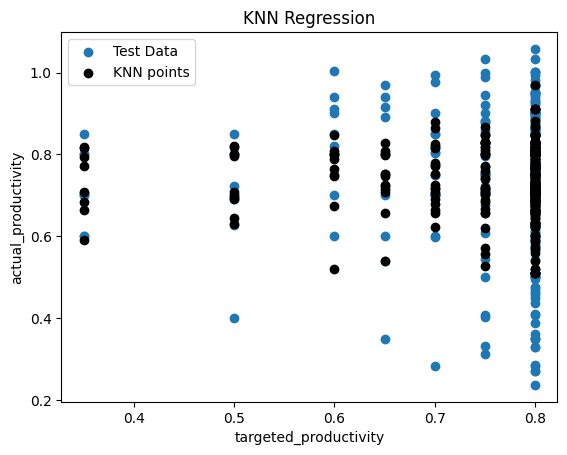

In [505]:
plt.scatter(data['targeted_productivity'][:len(y_test2)], y_test2, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred2)], y_pred2, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

70 - 30 SPLIT

In [506]:
model.fit(X_train3, y_train3)

KNeighborsRegressor(n_neighbors=20)

In [507]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0.75111146, 0.71027736, 0.68893305, 0.71303012, 0.71529371,
       0.715241  , 0.66948808, 0.70664271, 0.84972   , 0.77543631,
       0.661075  , 0.6160607 , 0.68965   , 0.82560892, 0.69371903,
       0.81018833, 0.5214177 , 0.73237798, 0.77372834, 0.73364198,
       0.83056771, 0.82784842, 0.74410415, 0.8253419 , 0.59665327,
       0.84952275, 0.780145  , 0.73250085, 0.65733763, 0.84001407,
       0.81320002, 0.65713491, 0.72117292, 0.661175  , 0.81382008,
       0.69690553, 0.70237811, 0.66763646, 0.60785313, 0.63408873,
       0.6160607 , 0.76669318, 0.69368845, 0.78025795, 0.77543631,
       0.81906003, 0.82323875, 0.70603655, 0.70237811, 0.68215625,
       0.68212765, 0.72367083, 0.81029362, 0.72108687, 0.7002833 ,
       0.73981813, 0.62199136, 0.65378028, 0.67904668, 0.63982822,
       0.65733763, 0.73237798, 0.6160607 , 0.63408873, 0.81167225,
       0.59726458, 0.61930456, 0.6160607 , 0.73371437, 0.8077158 ,
       0.69370199, 0.69201853, 0.74731974, 0.77372834, 0.93777

In [508]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted    Actual
1080   0.751111  0.750051
651    0.710277  0.600224
1059   0.688933  0.750396
1013   0.713030  0.800116
158    0.715294  0.801028
...         ...       ...
526    0.807275  0.971867
375    0.686215  0.800192
667    0.610744  0.750028
1171   0.651105  0.560625
659    0.876276  0.900130

[360 rows x 2 columns]

In [509]:
r2_score(y_test3,y_pred3)

0.2025263532779168

In [510]:
metrics.mean_absolute_error(y_test3,y_pred3)

0.11068849209333334

In [511]:
mean_squared_error(y_test3,y_pred3)

0.022593630082294553

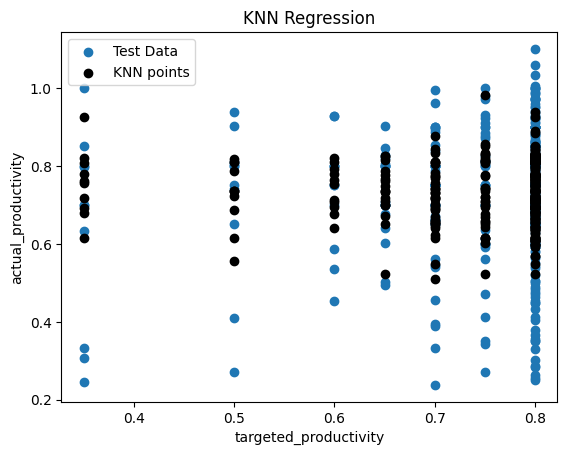

In [512]:
plt.scatter(data['targeted_productivity'][:len(y_test3)], y_test3, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred3)], y_pred3, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

60 - 40 SPLIT

In [513]:
model.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=20)

In [514]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0.84950066, 0.8111481 , 0.75540698, 0.82859361, 0.69173521,
       0.68570597, 0.6615    , 0.77889728, 0.82788254, 0.68865341,
       0.79713603, 0.77889728, 0.73070131, 0.82606497, 0.56735988,
       0.77527934, 0.95772977, 0.70632754, 0.76376635, 0.76869865,
       0.71133437, 0.69770446, 0.81484813, 0.75469057, 0.70511325,
       0.65412939, 0.59033765, 0.66822822, 0.77492377, 0.76635818,
       0.64332894, 0.82788254, 0.84716546, 0.72810728, 0.56735988,
       0.6766681 , 0.71031231, 0.65650792, 0.73785383, 0.57743615,
       0.72812432, 0.5749    , 0.82788254, 0.64442273, 0.65728958,
       0.78383759, 0.7459472 , 0.72840976, 0.69173521, 0.69770446,
       0.76635818, 0.64645716, 0.74314038, 0.6615    , 0.82788254,
       0.86278594, 0.72825628, 0.66451104, 0.72840976, 0.71491709,
       0.8111481 , 0.76635818, 0.70580854, 0.52601736, 0.6615    ,
       0.8111481 , 0.67719262, 0.71646591, 0.72324668, 0.8111481 ,
       0.70101625, 0.56735988, 0.8111481 , 0.5749    , 0.67985

In [515]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted    Actual
281    0.849501  0.884261
966    0.811148  0.800779
956    0.755407  0.556562
647    0.828594  0.750520
1062   0.691735  0.684889
...         ...       ...
1079   0.664493  0.750396
393    0.746927  0.966667
361    0.728410  0.750345
74     0.769338  0.800077
807    0.778897  0.800402

[479 rows x 2 columns]

In [516]:
r2_score(y_test4,y_pred4)

0.13744543047046165

In [517]:
metrics.mean_absolute_error(y_test4,y_pred4)

0.11367530021022965

In [518]:
mean_squared_error(y_test4,y_pred4)

0.023613059923068853

In [519]:
mse = mean_squared_error(y_test4, y_pred4)

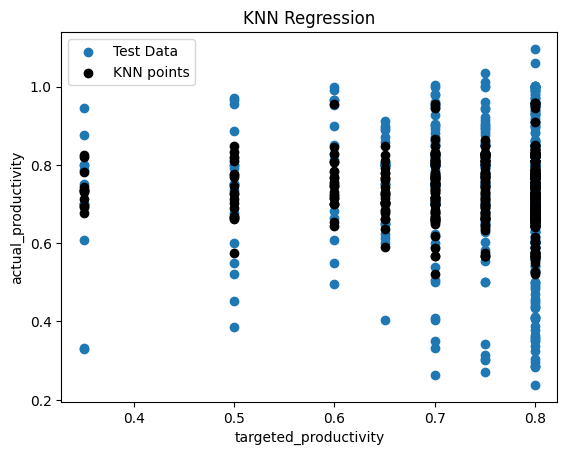

In [520]:
plt.scatter(data['targeted_productivity'][:len(y_test4)], y_test4, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred4)], y_pred4, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

#SVM before MULTICOLLINEARITY checking

In [521]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [522]:
model = SVR(kernel='rbf')

80 - 20 SPLIT

In [523]:
model.fit(X_train1, y_train1)

SVR()

In [524]:
y_pred1= model.predict(X_test1)
y_pred1

array([0.75511049, 0.74970273, 0.77079454, 0.77167495, 0.74864917,
       0.73952414, 0.7136193 , 0.72349089, 0.77324887, 0.76330309,
       0.68696318, 0.71634396, 0.71245864, 0.74792531, 0.76923042,
       0.74144405, 0.71433836, 0.77326429, 0.76651329, 0.69979961,
       0.76916009, 0.77337253, 0.76914631, 0.70707908, 0.74948815,
       0.76661528, 0.7707955 , 0.74567652, 0.74904652, 0.77327803,
       0.70569278, 0.75358411, 0.77208754, 0.69926169, 0.7327956 ,
       0.77055238, 0.75025223, 0.69397607, 0.77215278, 0.7180086 ,
       0.77207031, 0.76913904, 0.77337195, 0.70524832, 0.69664227,
       0.73362908, 0.74350561, 0.7733311 , 0.72348922, 0.7783266 ,
       0.76661423, 0.73911578, 0.77331938, 0.7168451 , 0.77288491,
       0.73384588, 0.76924413, 0.72348973, 0.74752779, 0.7691298 ,
       0.7067852 , 0.76652732, 0.74643384, 0.69203409, 0.73277359,
       0.73201185, 0.76925925, 0.74773764, 0.73911578, 0.73956061,
       0.73985482, 0.75823187, 0.73360495, 0.76934707, 0.69816

In [525]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted    Actual
1068   0.755110  0.980985
120    0.749703  0.800000
571    0.770795  0.740444
345    0.771675  0.728303
917    0.748649  0.700257
...         ...       ...
799    0.769772  0.565972
438    0.718733  0.997792
777    0.758021  0.650224
738    0.773331  0.664875
39     0.769171  0.625313

[240 rows x 2 columns]

In [526]:
r2_score=r2_score(y_test1,y_pred1)
r2_score

0.01203369385364772

In [527]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.135005958252177

In [528]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
mse
rmse

0.174922987884317

In [529]:
mape = mean_absolute_percentage_error(y_test1, y_pred1)
mape = mape * 100

In [530]:
mape

23.99785545235812

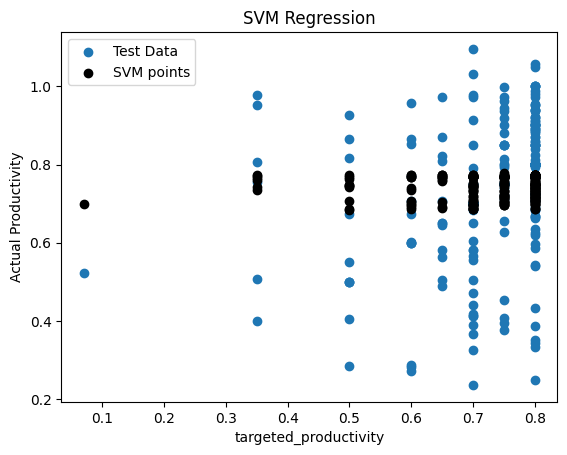

In [531]:
plt.scatter(X_test1['targeted_productivity'], y_test1, label='Test Data')
plt.scatter(X_test1['targeted_productivity'], y_pred1, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

75 - 25 SPLIT

In [532]:
model.fit(X_train2, y_train2)

SVR()

In [533]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0.75008072, 0.77132029, 0.71397029, 0.71185468, 0.79800894,
       0.76786769, 0.71034566, 0.73770034, 0.76728415, 0.69884566,
       0.68723151, 0.70456173, 0.70471379, 0.74970419, 0.76880483,
       0.74263667, 0.74687838, 0.73282639, 0.76791295, 0.76975332,
       0.7697663 , 0.71158613, 0.76782193, 0.74931041, 0.76962254,
       0.7091986 , 0.69604404, 0.71266721, 0.76721172, 0.69650888,
       0.72117376, 0.76878845, 0.70912987, 0.69993443, 0.76788207,
       0.73865181, 0.72008376, 0.70557918, 0.74919876, 0.74782134,
       0.74999698, 0.74705021, 0.76963721, 0.73312143, 0.76779309,
       0.76531251, 0.76981846, 0.72983761, 0.76976844, 0.68657336,
       0.74484883, 0.70128574, 0.76791291, 0.69038682, 0.76977863,
       0.68655207, 0.77373665, 0.68825825, 0.7688332 , 0.76788158,
       0.72802756, 0.7041615 , 0.7413942 , 0.68879613, 0.71139315,
       0.73447386, 0.76727537, 0.6986453 , 0.70667166, 0.7698431 ,
       0.74764131, 0.70087461, 0.69728288, 0.70289072, 0.75515

In [534]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted    Actual
131    0.750081  0.850182
4      0.771320  0.800382
51     0.713970  0.800030
74     0.711855  0.800077
1148   0.798009  0.477292
...         ...       ...
692    0.768806  1.004889
305    0.729570  0.800015
564    0.717099  0.900142
1168   0.707496  0.650044
514    0.712524  0.600598

[300 rows x 2 columns]

In [535]:
from sklearn.metrics import r2_score
print(r2_score(y_test2,y_pred2))

0.04001489722769569


In [536]:
print(metrics.mean_absolute_error(y_test2,y_pred2))

0.12368673368734041


In [537]:
print(mean_squared_error(y_test2,y_pred2))

0.026387431488789814


In [538]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
mse
rmse

0.1624420865686901

In [539]:
mape = mean_absolute_percentage_error(y_test2, y_pred2)
print(mape)
mape = mape * 100
print(mape)

0.21587056808723604
21.587056808723602


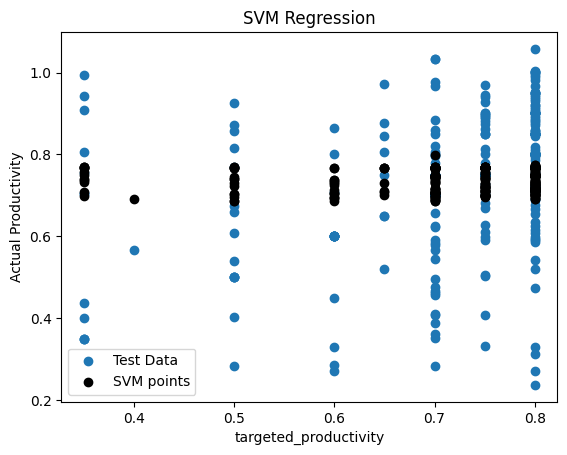

In [540]:
plt.scatter(X_test2['targeted_productivity'], y_test2, label='Test Data')
plt.scatter(X_test2['targeted_productivity'], y_pred2, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

70 - 30 SPLIT

In [541]:
model.fit(X_train3, y_train3)

SVR()

In [542]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0.71913223, 0.70655816, 0.69928399, 0.70300298, 0.7482145 ,
       0.74086702, 0.77395169, 0.77430006, 0.78274309, 0.72168447,
       0.77431742, 0.73889244, 0.77429107, 0.76645647, 0.69810777,
       0.77860298, 0.70056115, 0.77013382, 0.77526924, 0.77436967,
       0.78082666, 0.74606779, 0.7079106 , 0.75159183, 0.69962674,
       0.78078453, 0.7743417 , 0.72227017, 0.68751068, 0.77663783,
       0.74437048, 0.70481081, 0.77428856, 0.77432956, 0.78019413,
       0.71033585, 0.70093466, 0.77428749, 0.69394529, 0.68643955,
       0.7388191 , 0.78076858, 0.7807616 , 0.71618172, 0.72707832,
       0.78013348, 0.77853095, 0.70441286, 0.69762301, 0.70020655,
       0.7363147 , 0.74569379, 0.72666959, 0.69607802, 0.74554397,
       0.7479199 , 0.68836902, 0.71450866, 0.73818184, 0.76799376,
       0.68725191, 0.7702457 , 0.73881893, 0.68541165, 0.75944977,
       0.77428168, 0.70787667, 0.73883398, 0.69393579, 0.74770237,
       0.70016285, 0.70268585, 0.72914438, 0.77536172, 0.73626

In [543]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted    Actual
1080   0.719132  0.750051
651    0.706558  0.600224
1059   0.699284  0.750396
1013   0.703003  0.800116
158    0.748215  0.801028
...         ...       ...
526    0.776640  0.971867
375    0.710535  0.800192
667    0.751532  0.750028
1171   0.774312  0.560625
659    0.724040  0.900130

[360 rows x 2 columns]

In [544]:
print(r2_score(y_test3,y_pred3))

0.0181314162575128


In [545]:
print(metrics.mean_absolute_error(y_test3,y_pred3))

0.1234642462840348


In [546]:
print(mean_squared_error(y_test3,y_pred3))

0.02781781650301385


In [547]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)

0.16678673958985424


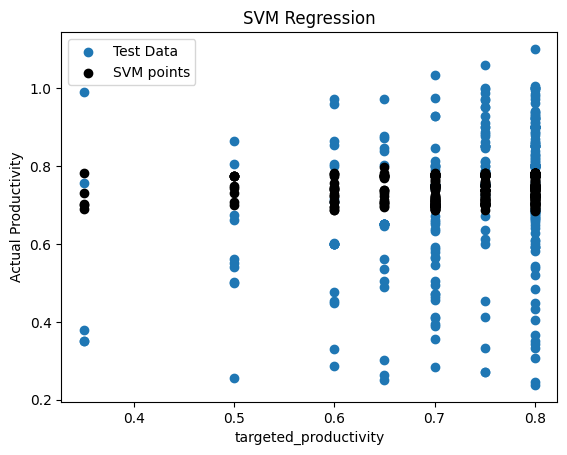

In [548]:
plt.scatter(X_test3['targeted_productivity'], y_test3, label='Test Data')
plt.scatter(X_test3['targeted_productivity'], y_pred3, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

60 - 40 SPLIT

In [549]:
model.fit(X_train4, y_train4)

SVR()

In [550]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0.76221749, 0.76875109, 0.76917692, 0.76159626, 0.73549887,
       0.76215752, 0.76210152, 0.70359408, 0.75078829, 0.76215973,
       0.74657696, 0.70283632, 0.74966934, 0.76624108, 0.71089441,
       0.72761936, 0.73835206, 0.71512701, 0.76917826, 0.76918858,
       0.71605736, 0.71145503, 0.78331429, 0.74439076, 0.70108053,
       0.7042608 , 0.71283686, 0.76211559, 0.75136069, 0.75434898,
       0.7196966 , 0.75082614, 0.75980248, 0.70394254, 0.71086233,
       0.72020839, 0.72284648, 0.76911932, 0.74843037, 0.7187117 ,
       0.70645515, 0.76909847, 0.7486225 , 0.71081988, 0.76910131,
       0.76216943, 0.73801995, 0.73780828, 0.7355762 , 0.70643368,
       0.75424974, 0.71558244, 0.70193306, 0.76212831, 0.75078829,
       0.73032366, 0.75265395, 0.76912297, 0.74714993, 0.72983333,
       0.76738949, 0.75428288, 0.74817744, 0.71272604, 0.76212831,
       0.77005652, 0.70334557, 0.76216975, 0.74850296, 0.76876731,
       0.76909915, 0.71089356, 0.76956024, 0.76909723, 0.70332

In [551]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted    Actual
281    0.762217  0.884261
966    0.768751  0.800779
956    0.769177  0.556562
647    0.761596  0.750520
1062   0.735499  0.684889
...         ...       ...
1079   0.710860  0.750396
393    0.729200  0.966667
361    0.747149  0.750345
74     0.724032  0.800077
807    0.701541  0.800402

[479 rows x 2 columns]

In [552]:
print(r2_score(y_test4,y_pred4))

0.025548409774761804


In [553]:
print(metrics.mean_absolute_error(y_test4,y_pred4))

0.12448060567193875


In [554]:
print(mean_squared_error(y_test4,y_pred4))

0.026676322408990854


In [555]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

0.16332887806199753

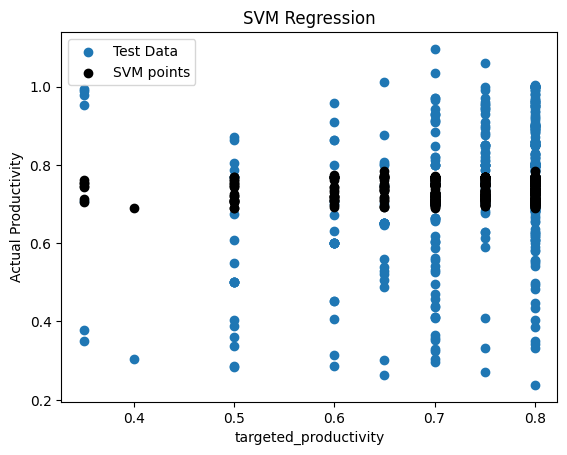

In [556]:
plt.scatter(X_test4['targeted_productivity'], y_test4, label='Test Data')
plt.scatter(X_test4['targeted_productivity'], y_pred4, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

#DECISION TREE before MULTICOLLINEARITY checking

In [557]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [558]:
clf = DecisionTreeRegressor()

80 - 20 SPLIT

In [559]:
clf = clf.fit(X_train1,y_train1)

In [560]:
y_pred1 = clf.predict(X_test1)
y_pred1

array([0.60765432, 0.8       , 0.75555556, 0.96410606, 0.62701118,
       0.8000345 , 0.75035613, 0.80040196, 0.85814394, 0.60044751,
       0.70013509, 0.80007184, 0.7505931 , 0.80059447, 0.4925    ,
       0.80080631, 0.85011396, 0.97186667, 0.92      , 0.80034377,
       0.4078125 , 0.95142045, 0.763375  , 0.80012872, 0.31120746,
       0.9422138 , 0.70266667, 0.69996522, 0.8       , 0.84545833,
       0.45201254, 0.36266667, 0.671875  , 0.70016471, 0.41083333,
       0.70025177, 0.85013677, 0.41155357, 0.31416667, 0.85036458,
       0.93164583, 0.54979167, 0.93649621, 0.70051357, 0.70051622,
       0.70061403, 0.80090961, 0.85366667, 0.80040196, 0.79541667,
       0.67336806, 0.65343137, 0.63025568, 0.85044615, 0.82355556,
       0.52681035, 0.80441667, 0.80040196, 0.8001171 , 0.67213542,
       0.80025096, 0.8300625 , 0.49998033, 0.49654971, 0.73805556,
       0.94998161, 0.91522917, 0.75054546, 0.65343137, 0.80070175,
       0.60012522, 0.80040196, 1.0006713 , 0.700623  , 0.35030

In [561]:
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.12032855422646138
Mean Absolute Error: 0.09228289577361111
Mean Squared Error: 0.02724407927767943


In [562]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.21092702514440453
Mean Absolute Error: 0.10093773864583332
Mean Squared Error: 0.024438177215058192


In [563]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.0810849797878268
Mean Absolute Error: 0.11325047717916667
Mean Squared Error: 0.028459481980907468


In [564]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.21092702514440453
Mean Absolute Error: 0.10093773864583332
Mean Squared Error: 0.024438177215058192


In [565]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.3364764319356134
Mean Absolute Error: 0.08669835223541668
Mean Squared Error: 0.020549818659918864


In [566]:
y_pred_train1 = clf.predict(X_train1)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.3364764319356134
Mean Absolute Error: 0.08669835223541668
Mean Squared Error: 0.020549818659918864


75 - 25 SPLIT

In [567]:
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.23236129286635832
Mean Absolute Error: 0.08147350454333334
Mean Squared Error: 0.02110034180127961


In [568]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.2751352531529726
Mean Absolute Error: 0.09344956935833333
Mean Squared Error: 0.0199245996535028


In [569]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.10547353836950935
Mean Absolute Error: 0.10510725255666666
Mean Squared Error: 0.024588147933773463


In [570]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.2372729859229924
Mean Absolute Error: 0.08083507861833333
Mean Squared Error: 0.020965332452018245


In [571]:
y_pred_train2 = clf.predict(X_train2)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.2372729859229924
Mean Absolute Error: 0.08083507861833333
Mean Squared Error: 0.020965332452018245


70 - 30 SPLIT

In [572]:
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.18074419971761313
Mean Absolute Error: 0.084729913725
Mean Squared Error: 0.023210751315027582


In [573]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.23137551244159382
Mean Absolute Error: 0.09373365531111111
Mean Squared Error: 0.021776289931922772


In [574]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.08360011363968434
Mean Absolute Error: 0.10608818452777778
Mean Squared Error: 0.025962989654876065


In [575]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train3,y_train3)
y_pred = clf.predict(X_test3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.08360011363968434
Mean Absolute Error: 0.10608818452777778
Mean Squared Error: 0.025962989654876065


In [576]:
y_pred_train3 = clf.predict(X_train3)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.08360011363968434
Mean Absolute Error: 0.10608818452777778
Mean Squared Error: 0.025962989654876065


60 - 40 SPLIT

In [577]:
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.18106118814912653
Mean Absolute Error: 0.08779311828079332
Mean Squared Error: 0.022419046771856747


In [578]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.2542984988966154
Mean Absolute Error: 0.09463576751878915
Mean Squared Error: 0.02041412201883143


In [579]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train4,y_train4)
y_pred = clf.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.2542984988966154
Mean Absolute Error: 0.09463576751878915
Mean Squared Error: 0.02041412201883143


In [580]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4 ,y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4 ,y_pred4))

R-squared: 0.18106329943600563
Mean Absolute Error: 0.08779253678810021
Mean Squared Error: 0.022418988973839843


In [581]:
y_pred_train4 = clf.predict(X_train4)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.18106329943600563
Mean Absolute Error: 0.08779253678810021
Mean Squared Error: 0.022418988973839843


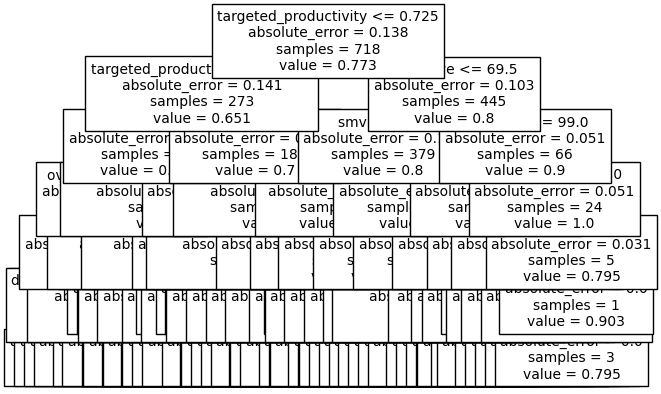

In [582]:
plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.savefig('out.pdf')

#BAGGING using RANDOM FORESTS before MULTICOLLINEARITY checking

In [583]:
from sklearn.ensemble import RandomForestRegressor

In [584]:
rf = RandomForestRegressor()

80 - 20 SPLIT

In [585]:
rf.fit(X_train1, y_train1)

RandomForestRegressor()

In [586]:
y_pred = rf.predict(X_test1)
y_pred

array([0.73072742, 0.80246403, 0.71422168, 0.91147694, 0.66477984,
       0.80007177, 0.74882804, 0.80040196, 0.83872985, 0.53267527,
       0.4877869 , 0.78803296, 0.75188439, 0.79932142, 0.72473717,
       0.77453835, 0.83883088, 0.79189346, 0.73880164, 0.80235663,
       0.51646702, 0.94409262, 0.71834436, 0.80473764, 0.57486627,
       0.87783709, 0.73238798, 0.69555649, 0.80726259, 0.69398495,
       0.57162602, 0.48776744, 0.65203534, 0.69500021, 0.46942213,
       0.67972535, 0.85013986, 0.43324144, 0.5855855 , 0.86843213,
       0.89853431, 0.65134608, 0.93164496, 0.70422157, 0.6934939 ,
       0.72365485, 0.80162192, 0.85158004, 0.80090531, 0.87934683,
       0.76004084, 0.6552796 , 0.6236567 , 0.83028136, 0.6401704 ,
       0.56738214, 0.81792021, 0.80090795, 0.80062084, 0.74711779,
       0.8001829 , 0.70350102, 0.50160872, 0.46277275, 0.6822118 ,
       0.94565496, 0.89631058, 0.73549965, 0.6552796 , 0.80040667,
       0.53369582, 0.80040053, 1.00340748, 0.69157206, 0.36130

In [587]:
mse = mean_squared_error(y_test1, y_pred)
mse

0.01613110131968864

In [588]:
r2 = r2_score(y_test1, y_pred)
r2

0.4791503476707468

In [589]:
mae = mean_absolute_error(y_test1, y_pred)
mae

0.08075490846346796

75 - 25 SPLIT

In [590]:
rf.fit(X_train2, y_train2)

RandomForestRegressor()

In [591]:
y_pred = rf.predict(X_test2)
y_pred

array([0.87723208, 0.79840868, 0.84097989, 0.80027833, 0.45501024,
       0.57499847, 0.75142594, 0.75052926, 0.98551788, 0.7512181 ,
       0.42306401, 0.45898514, 0.5132179 , 0.79806747, 0.83634816,
       0.69424187, 0.78973806, 0.60002163, 0.67380039, 0.70610057,
       0.8916156 , 0.46733634, 0.46740292, 0.70965304, 0.81049829,
       0.8038303 , 0.57275168, 0.80050616, 0.83253507, 0.45736623,
       0.7528523 , 0.8441041 , 0.88314921, 0.75120032, 0.76872343,
       0.55930066, 0.86671642, 0.62918589, 0.78394865, 0.76218113,
       0.85094157, 0.85013677, 0.79906169, 0.45134762, 0.63748933,
       0.66262599, 0.6758087 , 0.61225637, 0.7625959 , 0.46735919,
       0.71153953, 0.76805866, 0.76482121, 0.73432272, 0.47949433,
       0.39752998, 0.80097155, 0.49375864, 0.66397041, 0.76592257,
       0.98974622, 0.69479373, 0.80062016, 0.50343623, 0.70842391,
       0.79945129, 0.76916961, 0.56837675, 0.6805128 , 0.98852322,
       0.80162416, 0.79748035, 0.51660135, 0.57374614, 0.92379

In [592]:
mse = mean_squared_error(y_test2, y_pred)
mse

0.013137765089761564

In [593]:
r2 = r2_score(y_test2, y_pred)
r2

0.5220429553649004

In [594]:
mae = mean_absolute_error(y_test2, y_pred)
mae

0.06796558019045165

70 - 30 SPLIT

In [595]:
rf.fit(X_train3, y_train3)

RandomForestRegressor()

In [596]:
y_pred = rf.predict(X_test3)
y_pred

array([0.73973381, 0.63842214, 0.74425128, 0.58666694, 0.80626102,
       0.57741086, 0.77410895, 0.61755889, 0.79884893, 0.68803458,
       0.6422712 , 0.61880448, 0.769342  , 0.80039686, 0.74982246,
       0.92624004, 0.62425772, 0.86372553, 0.48238133, 0.78886412,
       0.82704183, 0.80162538, 0.68909635, 0.84938347, 0.65204394,
       0.74917906, 0.78759106, 0.65071655, 0.49609452, 0.65177622,
       0.99269296, 0.7997368 , 0.68618891, 0.62266307, 0.70858863,
       0.73438251, 0.80034278, 0.66966534, 0.42985561, 0.9057054 ,
       0.54011965, 0.6871456 , 0.67291963, 0.74092344, 0.80309859,
       0.84651296, 0.42530163, 0.80261765, 0.67459117, 0.79660279,
       0.88039972, 0.8000588 , 0.8543359 , 0.47219456, 0.60705813,
       0.81757267, 0.53237425, 0.83347983, 0.65843944, 0.69272114,
       0.81124995, 0.81620418, 0.55336177, 0.38920314, 0.8735742 ,
       0.46695338, 0.53262528, 0.64164459, 0.75987815, 0.80318613,
       0.80021194, 0.75048401, 0.81578537, 0.76052223, 0.98826

In [597]:
mse = mean_squared_error(y_test3, y_pred)
mse

0.018353254322911943

In [598]:
r2 = r2_score(y_test3, y_pred)
r2

0.35219632255641464

In [599]:
mae = mean_absolute_error(y_test3, y_pred)
mae

0.08081557892409161

60 - 40 SPLIT

In [600]:
rf.fit(X_train4, y_train4)

RandomForestRegressor()

In [601]:
y_pred = rf.predict(X_test4)
y_pred

array([1.00468566, 0.78676739, 0.62859993, 0.78253632, 0.82989211,
       0.66012074, 0.62204251, 0.8003862 , 0.850574  , 0.65414514,
       0.70235027, 0.79912785, 0.84617278, 0.90644002, 0.56687139,
       0.76353088, 0.99872491, 0.72657194, 0.74386654, 0.75547217,
       0.71097125, 0.54577713, 0.7405514 , 0.79114534, 0.65059859,
       0.48919301, 0.52701747, 0.76560937, 0.80984767, 0.81760463,
       0.60143663, 0.8500097 , 0.881744  , 0.79923622, 0.366494  ,
       0.51856544, 0.80316446, 0.58932675, 0.78992778, 0.51842596,
       0.80025429, 0.56153132, 0.79378145, 0.48345482, 0.64028431,
       0.8417267 , 0.82306438, 0.60876285, 0.82173277, 0.42828708,
       0.77118667, 0.79913658, 0.79952877, 0.84191365, 0.850574  ,
       0.85086387, 0.802999  , 0.55819386, 0.70550686, 0.82327783,
       0.56652519, 0.90050158, 0.73647439, 0.45094602, 0.84191365,
       1.0122869 , 0.6498778 , 0.76747059, 0.72829583, 0.7951921 ,
       0.74835335, 0.55374455, 0.97278488, 0.63196255, 0.68974

In [602]:
mse = mean_squared_error(y_test4, y_pred)
mse

0.01442300315628623

In [603]:
r2 = r2_score(y_test4, y_pred)
r2

0.47314633006797513

In [604]:
mae = mean_absolute_error(y_test4, y_pred)
mae

0.0752013802517313

#BOOSTING before MULTICOLLINEARITY checking

In [605]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [606]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

80 - 20 SPLIT

In [607]:
train_model1 = model1.fit(X_train1, y_train1)
train_model2 = model2.fit(X_train1, y_train1)

In [608]:
pred1 = train_model1.predict(X_test1)
pred2 = train_model2.predict(X_test1)

In [609]:
# Evaluate the models using regression metrics
mse1 = mean_squared_error(y_test1, pred1)
r2_1 = r2_score(y_test1, pred1)
mae1 = mean_absolute_error(y_test1, pred1)

In [610]:
mse2 = mean_squared_error(y_test1, pred2)
r2_2 = r2_score(y_test1, pred2)
mae2 = mean_absolute_error(y_test1, pred2)

In [611]:

print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0164, R-squared: 0.4703, MAE: 0.0814
Model 2 XGboost Report:
 MSE: 0.0169, R-squared: 0.4537, MAE: 0.0815


In [612]:
model3 = xgb.XGBRegressor()

In [613]:
train_model3 = model3.fit(X_train1, y_train1)
pred3 = train_model3.predict(X_test1)

In [614]:
mse3 = mean_squared_error(y_test1, pred1)
r2_3 = r2_score(y_test1, pred1)
mae3 = mean_absolute_error(y_test1, pred1)

print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0164, R-squared: 0.4703, MAE: 0.0814


In [615]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7,n_estimators=1000,max_depth=4,)

In [616]:
train_model7 = xgb2.fit(X_train1, y_train1)
pred7 = train_model7.predict(X_test1)

In [617]:
mse7 = mean_squared_error(y_test1, pred7)
r2_7 = r2_score(y_test1, pred7)
mae7 = mean_absolute_error(y_test1, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0205, R-squared: 0.3370, MAE: 0.0969


In [618]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train1, y_train1)
pred8 = rfc_model.predict(X_test1)
mse8 = mean_squared_error(y_test1, pred8)
r2_8 = r2_score(y_test1, pred8)
mae8 = mean_absolute_error(y_test1, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0158, R-squared: 0.4894, MAE: 0.0793


75 - 25 SPLIT

In [619]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [620]:
train_model1 = model1.fit(X_train2, y_train2)
train_model2 = model2.fit(X_train2, y_train2)

In [621]:
pred1 = train_model1.predict(X_test2)
pred2 = train_model2.predict(X_test2)

In [622]:
mse1 = mean_squared_error(y_test2, pred1)
r2_1 = r2_score(y_test2, pred1)
mae1 = mean_absolute_error(y_test2, pred1)

mse2 = mean_squared_error(y_test2, pred2)
r2_2 = r2_score(y_test2, pred2)
mae2 = mean_absolute_error(y_test2, pred2)



print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0148, R-squared: 0.4629, MAE: 0.0701
Model 2 XGboost Report:
 MSE: 0.0147, R-squared: 0.4662, MAE: 0.0743


In [623]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train2, y_train2)
pred3 = train_model3.predict(X_test2)
mse3 = mean_squared_error(y_test2, pred1)
r2_3 = r2_score(y_test2, pred1)
mae3 = mean_absolute_error(y_test2, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0148, R-squared: 0.4629, MAE: 0.0701


In [624]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7,n_estimators=1000,max_depth=4,)

In [625]:
train_model7 = xgb2.fit(X_train2, y_train2)
pred7 = train_model7.predict(X_test2)
mse7 = mean_squared_error(y_test2, pred7)
r2_7 = r2_score(y_test2, pred7)
mae7 = mean_absolute_error(y_test2, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0185, R-squared: 0.3264, MAE: 0.0808


In [626]:
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train2, y_train2)
pred8 = rfc_model.predict(X_test2)
mse8 = mean_squared_error(y_test2, pred8)
r2_8 = r2_score(y_test2, pred8)
mae8 = mean_absolute_error(y_test2, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0134, R-squared: 0.5131, MAE: 0.0681


70 - 30 SPLIT

In [627]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [628]:
train_model1 = model1.fit(X_train3, y_train3)
train_model2 = model2.fit(X_train3, y_train3)

In [629]:
pred1 = train_model1.predict(X_test3)
pred2 = train_model2.predict(X_test3)

In [630]:
mse1 = mean_squared_error(y_test3, pred1)
r2_1 = r2_score(y_test3, pred1)
mae1 = mean_absolute_error(y_test3, pred1)

mse2 = mean_squared_error(y_test3, pred2)
r2_2 = r2_score(y_test3, pred2)
mae2 = mean_absolute_error(y_test3, pred2)


In [631]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0229, R-squared: 0.1901, MAE: 0.0877
Model 2 XGboost Report:
 MSE: 0.0190, R-squared: 0.3291, MAE: 0.0818


In [632]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train3, y_train3)
pred3 = train_model3.predict(X_test3)
mse3 = mean_squared_error(y_test3, pred1)
r2_3 = r2_score(y_test3, pred1)
mae3 = mean_absolute_error(y_test3, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0229, R-squared: 0.1901, MAE: 0.0877


In [633]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7,n_estimators=1000,max_depth=4)

In [634]:
train_model7 = xgb2.fit(X_train3, y_train3)
pred7 = train_model7.predict(X_test3)
mse7 = mean_squared_error(y_test3, pred7)
r2_7 = r2_score(y_test3, pred7)
mae7 = mean_absolute_error(y_test3, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0257, R-squared: 0.0931, MAE: 0.0926


In [635]:
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train3, y_train3)
pred8 = rfc_model.predict(X_test3)
mse8 = mean_squared_error(y_test3, pred8)
r2_8 = r2_score(y_test3, pred8)
mae8 = mean_absolute_error(y_test3, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0189, R-squared: 0.3341, MAE: 0.0812


60 - 40 SPLIT

In [636]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [637]:
train_model1 = model1.fit(X_train4, y_train4)
train_model2 = model2.fit(X_train4, y_train4)

In [638]:
pred1 = train_model1.predict(X_test4)
pred2 = train_model2.predict(X_test4)

In [639]:
mse1 = mean_squared_error(y_test4, pred1)
r2_1 = r2_score(y_test4, pred1)
mae1 = mean_absolute_error(y_test4, pred1)

mse2 = mean_squared_error(y_test4, pred2)
r2_2 = r2_score(y_test4, pred2)
mae2 = mean_absolute_error(y_test4, pred2)

In [640]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0176, R-squared: 0.3578, MAE: 0.0821
Model 2 XGboost Report:
 MSE: 0.0152, R-squared: 0.4464, MAE: 0.0774


In [641]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train4, y_train4)
pred3 = train_model3.predict(X_test4)
mse3 = mean_squared_error(y_test4, pred1)
r2_3 = r2_score(y_test4, pred1)
mae3 = mean_absolute_error(y_test4, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0176, R-squared: 0.3578, MAE: 0.0821


In [642]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7,n_estimators=1000,max_depth=4)

In [643]:
train_model7 = xgb2.fit(X_train4, y_train4)
pred7 = train_model7.predict(X_test4)
mse7 = mean_squared_error(y_test4, pred7)
r2_7 = r2_score(y_test4, pred7)
mae7 = mean_absolute_error(y_test4, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0222, R-squared: 0.1894, MAE: 0.0958


In [644]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train4, y_train4)
pred8 = rfc_model.predict(X_test4)
mse8 = mean_squared_error(y_test4, pred8)
r2_8 = r2_score(y_test4, pred8)
mae8 = mean_absolute_error(y_test4, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0148, R-squared: 0.4584, MAE: 0.0763


ADABoost

In [645]:
from sklearn.ensemble import AdaBoostRegressor

In [646]:
estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=estimator, n_estimators=3, random_state=0)

80 - 20 SPLIT

In [647]:
adaboost.fit(X_train1, y_train1)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [648]:
y_pred1 = adaboost.predict(X_test1)
y_pred1

array([0.73840339, 0.77432953, 0.73840339, 0.73840339, 0.69620618,
       0.77432953, 0.77432953, 0.77432953, 0.6210867 , 0.69167529,
       0.48526693, 0.77432953, 0.77432953, 0.81102144, 0.83264325,
       0.77432953, 0.81102144, 0.75176881, 0.73840339, 0.77432953,
       0.6210867 , 0.83264325, 0.6210867 , 0.77432953, 0.77432953,
       0.75176881, 0.73840339, 0.69620618, 0.81102144, 0.69620618,
       0.67248123, 0.69620618, 0.69620618, 0.69620618, 0.6210867 ,
       0.69620618, 0.77432953, 0.48526693, 0.6210867 , 0.87198935,
       0.73840339, 0.6210867 , 0.83264325, 0.69620618, 0.69620618,
       0.67248123, 0.69620618, 0.81102144, 0.77432953, 0.91442432,
       0.81102144, 0.73840339, 0.6210867 , 0.81102144, 0.69620618,
       0.48526693, 0.83264325, 0.77432953, 0.77432953, 0.69620618,
       0.77432953, 0.81102144, 0.69167529, 0.47341945, 0.6210867 ,
       0.91442432, 0.83264325, 0.77432953, 0.73840339, 0.77432953,
       0.47341945, 0.77432953, 0.91442432, 0.69620618, 0.47341

In [649]:
mse = mean_squared_error(y_test1, y_pred1)
print("MSE:", mse)
r2 = r2_score(y_test1, y_pred1)
print("R-squared:", r2)
mae = mean_absolute_error(y_test1, y_pred1)
print("MAE:", mae)

MSE: 0.020111055838887712
R-squared: 0.35064344125878655
MAE: 0.10166845401646947


75 - 25 SPLIT

In [650]:
adaboost.fit(X_train2, y_train2)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [651]:
y_pred2 = adaboost.predict(X_test2)
y_pred2

array([0.8125472 , 0.8125472 , 0.8125472 , 0.8125472 , 0.4876828 ,
       0.62791636, 0.74843244, 0.74843244, 0.76404684, 0.74843244,
       0.49220739, 0.49220739, 0.49220739, 0.8125472 , 0.7801684 ,
       0.66553904, 0.67842367, 0.49220739, 0.74843244, 0.65526622,
       0.7801684 , 0.61849892, 0.65526622, 0.62791636, 0.76404684,
       0.8125472 , 0.61849892, 0.8125472 , 0.7801684 , 0.49220739,
       0.74843244, 0.7801684 , 0.74843244, 0.74843244, 0.74843244,
       0.49220739, 0.8125472 , 0.61849892, 0.8125472 , 0.67842367,
       0.8125472 , 0.8125472 , 0.7801684 , 0.61849892, 0.65526622,
       0.67842367, 0.7801684 , 0.4876828 , 0.65526622, 0.49220739,
       0.67842367, 0.67842367, 0.74843244, 0.66553904, 0.62791636,
       0.49220739, 0.79065099, 0.61849892, 0.66553904, 0.66553904,
       0.9336167 , 0.66553904, 0.8125472 , 0.61849892, 0.74843244,
       0.8125472 , 0.74843244, 0.61849892, 0.66553904, 0.74843244,
       0.8125472 , 0.74843244, 0.49220739, 0.49220739, 0.93361

In [652]:
mse = mean_squared_error(y_test2, y_pred2)
print("MSE:", mse)
r2 = r2_score(y_test2, y_pred2)
print("R-squared:", r2)
mae = mean_absolute_error(y_test2, y_pred2)
print("MAE:", mae)

MSE: 0.017554677432822845
R-squared: 0.3613539526708982
MAE: 0.09295210971951512


70 - 30

In [653]:
adaboost.fit(X_train3, y_train3)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [654]:
y_pred3 = adaboost.predict(X_test3)
y_pred3

array([0.70216968, 0.49643985, 0.76700836, 0.76700836, 0.80410558,
       0.45728099, 0.76700836, 0.60564209, 0.76700836, 0.7078469 ,
       0.72207186, 0.44705655, 0.7078469 , 0.80410558, 0.76700836,
       0.80410558, 0.48349219, 0.76700836, 0.7078469 , 0.76700836,
       0.76700836, 0.80410558, 0.7078469 , 0.8225051 , 0.80410558,
       0.80410558, 0.76700836, 0.7078469 , 0.45728099, 0.80410558,
       0.91335574, 0.80410558, 0.76700836, 0.72207186, 0.80410558,
       0.66207495, 0.80410558, 0.76700836, 0.45728099, 0.80410558,
       0.72207186, 0.72207186, 0.7078469 , 0.7078469 , 0.80410558,
       0.80410558, 0.56230485, 0.80410558, 0.66207495, 0.80410558,
       0.76700836, 0.80410558, 0.8225051 , 0.60564209, 0.49643985,
       0.76700836, 0.60564209, 0.80410558, 0.70216968, 0.60564209,
       0.80410558, 0.7078469 , 0.72207186, 0.45728099, 0.8225051 ,
       0.56230485, 0.66207495, 0.76700836, 0.80410558, 0.80410558,
       0.80410558, 0.76700836, 0.76700836, 0.76700836, 0.82250

In [655]:
mse = mean_squared_error(y_test3, y_pred3)
print("MSE:", mse)
r2 = r2_score(y_test3, y_pred3)
print("R-squared:", r2)
mae = mean_absolute_error(y_test3, y_pred3)
print("MAE:", mae)

MSE: 0.019505451489723723
R-squared: 0.3115279185410593
MAE: 0.09348897354058165


In [656]:
adaboost.fit(X_train4, y_train4)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [657]:
y_pred4 = adaboost.predict(X_test4)
y_pred4

array([0.80259853, 0.7923702 , 0.7744217 , 0.66188486, 0.66188486,
       0.65018357, 0.66188486, 0.80259853, 0.81370347, 0.65018357,
       0.66202667, 0.7923702 , 0.80259853, 0.80259853, 0.7744217 ,
       0.74624671, 0.91804865, 0.7923702 , 0.80259853, 0.80259853,
       0.70803653, 0.47779148, 0.65018357, 0.66202667, 0.66188486,
       0.47779148, 0.47779148, 0.66188486, 0.80259853, 0.80259853,
       0.47779148, 0.81370347, 0.80259853, 0.80259853, 0.65018357,
       0.65894063, 0.80259853, 0.59076852, 0.80259853, 0.47779148,
       0.80259853, 0.66188486, 0.80259853, 0.47779148, 0.66188486,
       0.7744217 , 0.66188486, 0.47779148, 0.66188486, 0.47779148,
       0.65018357, 0.80259853, 0.80259853, 0.66188486, 0.81370347,
       0.81370347, 0.80259853, 0.59076852, 0.74624671, 0.80259853,
       0.47779148, 0.80259853, 0.7923702 , 0.47779148, 0.66188486,
       0.91804865, 0.47779148, 0.65018357, 0.80259853, 0.80259853,
       0.66188486, 0.7744217 , 0.91804865, 0.65018357, 0.66202

In [658]:
mse = mean_squared_error(y_test4, y_pred4)
print("MSE:", mse)
r2 = r2_score(y_test4, y_pred4)
print("R-squared:", r2)
mae = mean_absolute_error(y_test4, y_pred4)
print("MAE:", mae)

MSE: 0.021296853543912173
R-squared: 0.2220534568263871
MAE: 0.10530701401759493


#MULTICOLINEARITY using Variance Inflation Factor(VIF)

In [659]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [660]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

variables        VIF
0                    team   4.732500
1   targeted_productivity  12.350808
2                     smv  18.036447
3               over_time   7.166048
4               incentive   1.103324
5               idle_time   1.492213
6                idle_men   1.563800
7      no_of_style_change   1.566141
8           no_of_workers  48.515423
9              day_binary   1.513058
10       quarter_Quarter2   1.935032
11       quarter_Quarter3   1.610072
12       quarter_Quarter4   1.795143
13       quarter_Quarter5   1.148189
14  department_finishing    2.080977
15      department_sweing  23.559402

In [661]:
calc_vif(X.drop('no_of_workers', axis=1))

variables        VIF
0                    team   4.655391
1   targeted_productivity  10.906711
2                     smv  14.244128
3               over_time   6.154119
4               incentive   1.099404
5               idle_time   1.492139
6                idle_men   1.559137
7      no_of_style_change   1.497347
8              day_binary   1.511988
9        quarter_Quarter2   1.934861
10       quarter_Quarter3   1.609993
11       quarter_Quarter4   1.794113
12       quarter_Quarter5   1.147719
13  department_finishing    2.080922
14      department_sweing  13.271302

In [662]:
calc_vif(X.drop(['no_of_workers','smv'], axis=1))

variables       VIF
0                    team  4.394002
1   targeted_productivity  9.970066
2               over_time  5.747457
3               incentive  1.099397
4               idle_time  1.492062
5                idle_men  1.554649
6      no_of_style_change  1.449999
7              day_binary  1.511863
8        quarter_Quarter2  1.933154
9        quarter_Quarter3  1.609669
10       quarter_Quarter4  1.793995
11       quarter_Quarter5  1.146136
12  department_finishing   2.080529
13      department_sweing  6.950013

In [663]:
calc_vif(X.drop(['no_of_workers','smv','targeted_productivity'], axis=1))

variables       VIF
0                    team  3.166119
1               over_time  5.486969
2               incentive  1.084794
3               idle_time  1.491642
4                idle_men  1.553609
5      no_of_style_change  1.439650
6              day_binary  1.456817
7        quarter_Quarter2  1.709498
8        quarter_Quarter3  1.511013
9        quarter_Quarter4  1.678291
10       quarter_Quarter5  1.139899
11  department_finishing   1.679275
12      department_sweing  6.511808

In [664]:
calc_vif(X.drop(['no_of_workers','smv','targeted_productivity','department_sweing'], axis=1))

variables       VIF
0                    team  2.824925
1               over_time  2.356929
2               incentive  1.082418
3               idle_time  1.491067
4                idle_men  1.539909
5      no_of_style_change  1.272883
6              day_binary  1.454919
7        quarter_Quarter2  1.708352
8        quarter_Quarter3  1.510918
9        quarter_Quarter4  1.671193
10       quarter_Quarter5  1.127056
11  department_finishing   1.377880

In [665]:
import statsmodels.api as sm

In [666]:
X_train_nomulti = X.drop(['no_of_workers','smv','targeted_productivity','department_sweing'], axis=1)

#REGRESSION ANALYSIS after MULTICOLLINEARITY checking

In [667]:
X_train1_nomulti, X_test1_nomulti, y_train1, y_test1 = train_test_split(X_train_nomulti, y, test_size=0.20, random_state=42)
X_train2_nomulti, X_test2_nomulti, y_train2, y_test2 = train_test_split(X_train_nomulti, y, test_size=0.25, random_state=42)
X_train3_nomulti, X_test3_nomulti, y_train3, y_test3 = train_test_split(X_train_nomulti, y, test_size=0.30, random_state=42)
X_train4_nomulti, X_test4_nomulti, y_train4, y_test4 = train_test_split(X_train_nomulti, y, test_size=0.40, random_state=42)

#MULTIPLE REGRESSION after MULTICOLLINEARITY checking

80 - 20 SPLIT

In [668]:
lm2 = LinearRegression()
lm2.fit(X_train1_nomulti, y_train1)
y_pred1 = lm2.predict(X_test1_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

0.16774031059882089


In [669]:
r2_score(y_test1,y_pred1)

-0.05966847843529455

In [670]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.12812296077521157

75 -25 SPLIT

In [671]:
lm2 = LinearRegression()
lm2.fit(X_train2_nomulti, y_train2)
y_pred2 = lm2.predict(X_test2_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

0.17486402698998427


In [672]:
r2_score(y_test2,y_pred2)

-0.08588055076792567

In [673]:
metrics.mean_absolute_error(y_test2,y_pred2)

0.13203137467290268

70 - 30 SPLIT

In [674]:
lm2 = LinearRegression()
lm2.fit(X_train3_nomulti, y_train3)
y_pred3 = lm2.predict(X_test3_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

0.1746142824271332


In [675]:
r2_score(y_test3,y_pred3)

-0.020144747197617496

In [676]:
metrics.mean_absolute_error(y_test3,y_pred3)

0.1312106162769853

60 - 40 SPLIT

In [677]:
lm2 = LinearRegression()
lm2.fit(X_train4_nomulti, y_train4)
y_pred4 = lm2.predict(X_test4_nomulti)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

0.37657945909598756


In [678]:
r2_score(y_test4,y_pred4)

-3.8512088805948475

In [679]:
metrics.mean_absolute_error(y_test4,y_pred4)

0.1572824587216819

#KNN after MULTICOLLINEARITY checking

In [680]:
from sklearn.neighbors import KNeighborsRegressor

In [681]:
model=KNeighborsRegressor(n_neighbors=20)

80 - 20 SPLIT

In [682]:
model.fit(X_train1_nomulti, y_train1)

KNeighborsRegressor(n_neighbors=20)

In [683]:
y_pred1 = model.predict(X_test1_nomulti)
y_pred1

array([0.66063649, 0.72199845, 0.70837563, 0.68480042, 0.68153333,
       0.79537538, 0.5239606 , 0.5239606 , 0.75821574, 0.7412593 ,
       0.64979705, 0.573679  , 0.75948675, 0.80640486, 0.83016219,
       0.81533223, 0.77929741, 0.7456655 , 0.68816004, 0.72724762,
       0.77929741, 0.74550008, 0.8653425 , 0.80640486, 0.77704762,
       0.65384403, 0.72716288, 0.92527874, 0.68828209, 0.80397695,
       0.85780397, 0.80294856, 0.81921431, 0.83515074, 0.70969376,
       0.59515202, 0.85023485, 0.75948675, 0.80294856, 0.63899375,
       0.79710148, 0.83031585, 0.69052854, 0.76819427, 0.71148688,
       0.80294856, 0.63709375, 0.75449792, 0.76284575, 0.69351815,
       0.77929741, 0.79523652, 0.62177604, 0.81704532, 0.61001563,
       0.69669896, 0.5239606 , 0.72197534, 0.79259722, 0.72876286,
       0.68882917, 0.6568845 , 0.68445377, 0.76512053, 0.69340917,
       0.65500521, 0.7603471 , 0.68828209, 0.5019898 , 0.67777987,
       0.82963234, 0.65838556, 0.64136526, 0.64979705, 0.77781

In [684]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted    Actual
921    0.660636  0.268214
321    0.721998  0.800359
101    0.708376  0.681061
920    0.684800  0.325000
58     0.681533  0.667604
...         ...       ...
381    0.701431  0.700170
529    0.723803  0.971867
1069   0.684800  0.950625
649    0.848116  0.715767
869    0.699070  0.800003

[240 rows x 2 columns]

In [685]:
print(r2_score(y_test1,y_pred1))

0.15995424378530487


In [686]:
print(metrics.mean_absolute_error(y_test1,y_pred1))

0.11170875130375


In [687]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

0.1493495457649606


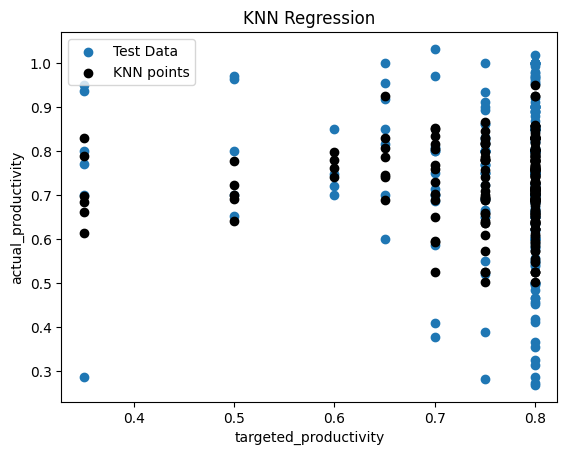

In [688]:
plt.scatter(data['targeted_productivity'][:len(y_test1)], y_test1, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred1)], y_pred1, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

75 - 25 SPLIT

In [689]:
model.fit(X_train2_nomulti, y_train2)

KNeighborsRegressor(n_neighbors=20)

In [690]:
y_pred2 = model.predict(X_test2_nomulti)
y_pred2

array([0.65926724, 0.72700622, 0.70837563, 0.71773688, 0.66072865,
       0.79537538, 0.53183211, 0.53183211, 0.75821574, 0.7412593 ,
       0.66990919, 0.573679  , 0.75948675, 0.80391209, 0.81070351,
       0.81241174, 0.77929741, 0.75835755, 0.69068005, 0.7014295 ,
       0.77929741, 0.72460213, 0.8653425 , 0.80391209, 0.7871895 ,
       0.65933582, 0.72716288, 0.92780301, 0.68290435, 0.80956344,
       0.84372147, 0.78510819, 0.81921431, 0.84006185, 0.71972034,
       0.59767238, 0.83075874, 0.75948675, 0.78510819, 0.66812396,
       0.81407255, 0.83031585, 0.69475583, 0.77318206, 0.72211458,
       0.78510819, 0.66387396, 0.75449792, 0.76286506, 0.68545896,
       0.77929741, 0.79523652, 0.62177604, 0.81704532, 0.61258333,
       0.70319502, 0.53183211, 0.72700344, 0.80489961, 0.7267921 ,
       0.69253655, 0.6512614 , 0.66844453, 0.76678047, 0.69340917,
       0.63733333, 0.76286506, 0.68290435, 0.5019898 , 0.67961136,
       0.82963234, 0.65935168, 0.6413875 , 0.67084623, 0.77781

In [691]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted    Actual
921    0.659267  0.268214
321    0.727006  0.800359
101    0.708376  0.681061
920    0.717737  0.325000
58     0.660729  0.667604
...         ...       ...
1166   0.690680  0.700246
461    0.843721  0.900130
801    0.663199  0.329965
1054   0.785108  0.800402
789    0.707037  0.802243

[300 rows x 2 columns]

In [692]:
print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))
print(mean_squared_error(y_test2,y_pred2))

0.17308698832319924
0.1121634656795
0.023285132978307085


In [693]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
print(rmse)

0.1525946689052638


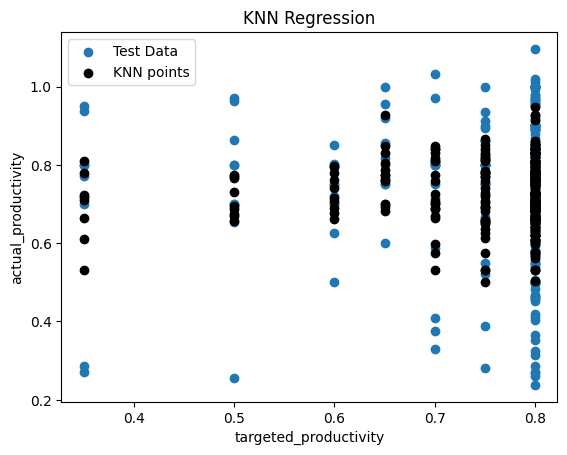

In [694]:
plt.scatter(data['targeted_productivity'][:len(y_test2)], y_test2, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred2)], y_pred2, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

70 - 30 SPLIT

In [695]:
model.fit(X_train3_nomulti, y_train3)

KNeighborsRegressor(n_neighbors=20)

In [696]:
y_pred3 = model.predict(X_test3_nomulti)
y_pred3

array([0.67528063, 0.72700622, 0.72706881, 0.741775  , 0.59840625,
       0.77286655, 0.54909122, 0.54909122, 0.78321226, 0.74538895,
       0.6678933 , 0.56674395, 0.77202981, 0.80391209, 0.81070351,
       0.81222519, 0.77286655, 0.75835755, 0.69068005, 0.70894424,
       0.77286655, 0.71922498, 0.85910417, 0.80391209, 0.7871895 ,
       0.67436277, 0.72716288, 0.92780301, 0.65532787, 0.81003361,
       0.82622279, 0.78260312, 0.81100191, 0.83945583, 0.72466884,
       0.60514635, 0.80370091, 0.77202981, 0.78260312, 0.67647708,
       0.81154743, 0.82779073, 0.66605792, 0.78068195, 0.72568073,
       0.78260312, 0.64994375, 0.7343875 , 0.76286506, 0.7423226 ,
       0.77286655, 0.76492978, 0.61060937, 0.81203708, 0.60133333,
       0.70319502, 0.54909122, 0.72700344, 0.80255539, 0.7267921 ,
       0.70068049, 0.69193658, 0.66845544, 0.76678047, 0.69340917,
       0.62277083, 0.76286506, 0.65532787, 0.5019898 , 0.68208227,
       0.82709815, 0.67176385, 0.6413875 , 0.6678933 , 0.77781

In [697]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted    Actual
921    0.675281  0.268214
321    0.727006  0.800359
101    0.727069  0.681061
920    0.741775  0.325000
58     0.598406  0.667604
...         ...       ...
318    0.675281  0.977273
106    0.827791  0.850502
793    0.710346  0.750651
55     0.698755  0.750243
1114   0.780333  0.850071

[360 rows x 2 columns]

In [698]:
print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))
print(mean_squared_error(y_test3,y_pred3))

0.13539317508361648
0.11759077004236111
0.025841420841404113


In [699]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)

0.16075266978001987


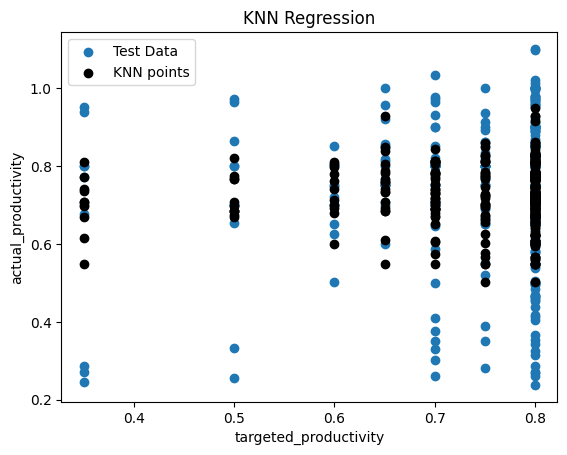

In [700]:
plt.scatter(data['targeted_productivity'][:len(y_test3)], y_test3, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred3)], y_pred3, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

60 - 40 SPLIT

In [701]:
model.fit(X_train4_nomulti, y_train4)

KNeighborsRegressor(n_neighbors=20)

In [702]:
y_pred4 = model.predict(X_test4_nomulti)
y_pred4

array([0.67528527, 0.72564666, 0.7136834 , 0.74865792, 0.63180156,
       0.77423018, 0.56609606, 0.56609606, 0.75322675, 0.72094968,
       0.66186863, 0.56610534, 0.76139982, 0.81069963, 0.79572986,
       0.82331771, 0.77423018, 0.75988107, 0.69179685, 0.71396544,
       0.77423018, 0.72859889, 0.88490333, 0.81069963, 0.79879498,
       0.65874705, 0.72716288, 0.95019436, 0.67531233, 0.80945785,
       0.78566649, 0.77953907, 0.79679429, 0.80489618, 0.72579906,
       0.60514635, 0.79493647, 0.76139982, 0.77953907, 0.65656979,
       0.82128368, 0.82211202, 0.66003292, 0.78818949, 0.72566039,
       0.77953907, 0.62670833, 0.74910938, 0.74535961, 0.74256881,
       0.77423018, 0.72241472, 0.59709375, 0.81211377, 0.59315104,
       0.68178739, 0.56663098, 0.72564388, 0.80255539, 0.72777951,
       0.70068049, 0.69371657, 0.67365543, 0.78974062, 0.68526234,
       0.60923958, 0.74003529, 0.67531233, 0.5019898 , 0.69145292,
       0.82211202, 0.6780453 , 0.64134273, 0.65684407, 0.77531

In [703]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted    Actual
921    0.675285  0.268214
321    0.725647  0.800359
101    0.713683  0.681061
920    0.748658  0.325000
58     0.631802  0.667604
...         ...       ...
71     0.707550  0.800251
94     0.719089  0.800274
543    0.957687  1.000671
33     0.749109  0.782448
1174   0.757330  0.874028

[479 rows x 2 columns]

In [704]:
print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))
print(mean_squared_error(y_test4,y_pred4))

0.11624850729083569
0.11716195200167012
0.0258341061855287


In [705]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
print(rmse)

0.16072991689641572


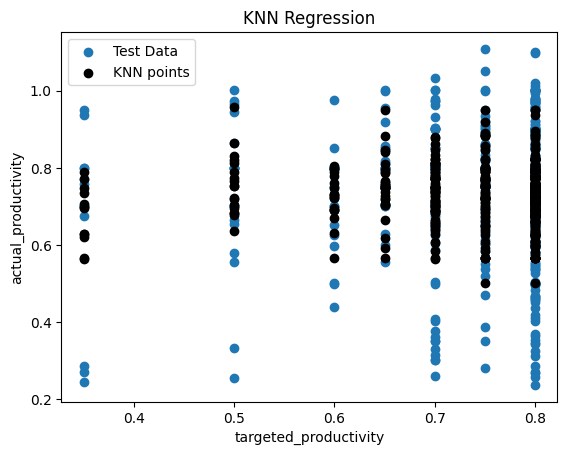

In [706]:
plt.scatter(data['targeted_productivity'][:len(y_test4)], y_test4,label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_pred4)], y_pred4, color='black', linewidth=1, label='KNN points')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.title('KNN Regression')
plt.legend()
plt.show()

#SVM after MULTICOLLINEARITY checking

In [707]:
model = SVR(kernel='rbf')

80 - 20 SPLIT

In [708]:
model.fit(X_train1_nomulti, y_train1)

SVR()

In [709]:
y_pred1= model.predict(X_test1_nomulti)
y_pred1

array([0.68467351, 0.7077213 , 0.77301752, 0.76651282, 0.76642448,
       0.72360047, 0.72724009, 0.72724078, 0.74150083, 0.70577237,
       0.71506302, 0.69794446, 0.72886091, 0.74478743, 0.75242765,
       0.77311387, 0.72930724, 0.76653727, 0.69896584, 0.75768998,
       0.72932345, 0.71169433, 0.77107447, 0.74482906, 0.75097144,
       0.74225249, 0.77301548, 0.7401523 , 0.68771574, 0.77309408,
       0.73084782, 0.71789736, 0.76611438, 0.76891496, 0.74587123,
       0.69908506, 0.77186842, 0.72886026, 0.717897  , 0.76638432,
       0.74372082, 0.7504593 , 0.76645857, 0.75909548, 0.71699299,
       0.71789809, 0.7663845 , 0.76653437, 0.72223562, 0.77299848,
       0.72542115, 0.73080334, 0.76643938, 0.74831013, 0.76644006,
       0.74080035, 0.72709834, 0.70526292, 0.77309338, 0.76011422,
       0.77303631, 0.77297985, 0.73177633, 0.75080883, 0.72021615,
       0.76644233, 0.72214516, 0.68782246, 0.70535279, 0.71673706,
       0.75114669, 0.71020003, 0.71532046, 0.71017413, 0.72149

In [710]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted    Actual
921    0.684674  0.268214
321    0.707721  0.800359
101    0.773018  0.681061
920    0.766513  0.325000
58     0.766424  0.667604
...         ...       ...
381    0.746904  0.700170
529    0.766407  0.971867
1069   0.766513  0.950625
649    0.770962  0.715767
869    0.705475  0.800003

[240 rows x 2 columns]

In [711]:
print(r2_score(y_test1,y_pred1))
print(metrics.mean_absolute_error(y_test1,y_pred1))
print(metrics.mean_squared_error(y_test1,y_pred1))

0.03687020925408757
0.1228253770164919
0.025573471526682344


In [712]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

0.1599170770326995


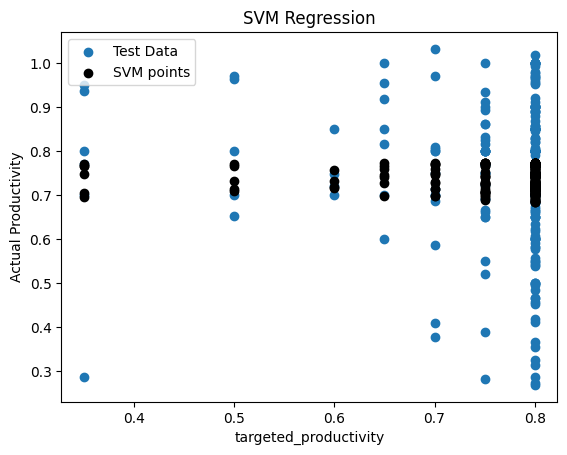

In [713]:
plt.scatter(data['targeted_productivity'][:len(y_test1)], y_test1, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test1)], y_pred1, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

75- 25 SPLIT

In [714]:
model.fit(X_train2_nomulti, y_train2)

SVR()

In [715]:
y_pred2 = model.predict(X_test2_nomulti)
y_pred2

array([0.68473053, 0.70646626, 0.77723577, 0.77343812, 0.77334855,
       0.73645828, 0.7258919 , 0.72589251, 0.74057046, 0.70596886,
       0.7149477 , 0.69835375, 0.72795164, 0.74391046, 0.75098265,
       0.77733369, 0.74155063, 0.76694141, 0.69811837, 0.75630989,
       0.74156695, 0.71025658, 0.77660508, 0.74395296, 0.75042924,
       0.74022627, 0.77723372, 0.73907925, 0.68842482, 0.77731362,
       0.73013605, 0.71620366, 0.76711572, 0.77513103, 0.74574851,
       0.69942695, 0.77432843, 0.72795099, 0.71620346, 0.77330797,
       0.75197605, 0.75086045, 0.77338315, 0.75705279, 0.71537102,
       0.71620447, 0.77330803, 0.77345995, 0.72162913, 0.77721644,
       0.73807281, 0.72977082, 0.77336379, 0.74843184, 0.77336428,
       0.7380393 , 0.72574562, 0.70412894, 0.77731288, 0.760329  ,
       0.77725489, 0.7771974 , 0.72918544, 0.75026243, 0.71888545,
       0.77336671, 0.72153205, 0.68853763, 0.70530077, 0.71574902,
       0.75113835, 0.70890869, 0.71495222, 0.71021546, 0.72086

In [716]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted    Actual
921    0.684731  0.268214
321    0.706466  0.800359
101    0.777236  0.681061
920    0.773438  0.325000
58     0.773349  0.667604
...         ...       ...
1166   0.698159  0.700246
461    0.722825  0.900130
801    0.683789  0.329965
1054   0.713169  0.800402
789    0.768163  0.802243

[300 rows x 2 columns]

In [717]:
print(r2_score(y_test2,y_pred2))
print(metrics.mean_absolute_error(y_test2,y_pred2))
print(mean_squared_error(y_test2,y_pred2))

0.02736765675183528
0.12368791377713961
0.027388459404709267


In [718]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
print(rmse)

0.16549459025813884


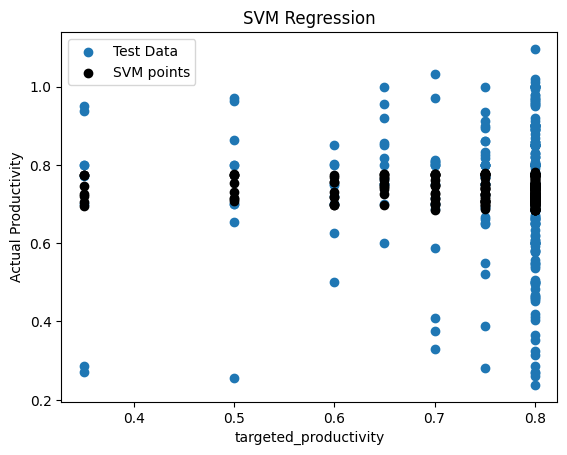

In [719]:
plt.scatter(data['targeted_productivity'][:len(y_test2)], y_test2, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test2)], y_pred2, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

70 - 30 SPLIT

In [720]:
model.fit(X_train3_nomulti, y_train3)

SVR()

In [721]:
y_pred3 = model.predict(X_test3_nomulti)
y_pred3

array([0.68744249, 0.71008301, 0.77519478, 0.76604738, 0.76596263,
       0.71508333, 0.73220752, 0.73220817, 0.74235343, 0.70508463,
       0.71346512, 0.69810567, 0.72616328, 0.74992116, 0.75208955,
       0.77528767, 0.71937533, 0.77073414, 0.70161522, 0.75708463,
       0.71939082, 0.7151583 , 0.77204548, 0.74996136, 0.75605732,
       0.74189786, 0.77519282, 0.73619041, 0.68890111, 0.77526852,
       0.72775003, 0.72037171, 0.77057459, 0.76920483, 0.74721964,
       0.69914695, 0.77542055, 0.7261627 , 0.72037147, 0.76592402,
       0.75245083, 0.75198978, 0.76599526, 0.75773977, 0.72013309,
       0.72037245, 0.76592409, 0.7660682 , 0.7201328 , 0.77517651,
       0.71643215, 0.72794854, 0.76597693, 0.74972755, 0.76597752,
       0.73784376, 0.73206997, 0.70766978, 0.77526785, 0.76495274,
       0.77521302, 0.77515858, 0.72992702, 0.75589987, 0.7187924 ,
       0.76597973, 0.72004406, 0.68900519, 0.7049232 , 0.71552429,
       0.75225575, 0.71470594, 0.71390128, 0.70906751, 0.71948

In [722]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted    Actual
921    0.687442  0.268214
321    0.710083  0.800359
101    0.775195  0.681061
920    0.766047  0.325000
58     0.765963  0.667604
...         ...       ...
318    0.687392  0.977273
106    0.752045  0.850502
793    0.710692  0.750651
55     0.711387  0.750243
1114   0.724364  0.850071

[360 rows x 2 columns]

In [723]:
print(r2_score(y_test3,y_pred3))
print(metrics.mean_absolute_error(y_test3,y_pred3))
print(mean_squared_error(y_test3,y_pred3))

0.021375135607924034
0.12776654919047623
0.029249198870322797


In [724]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
print(rmse)

0.171023971624807


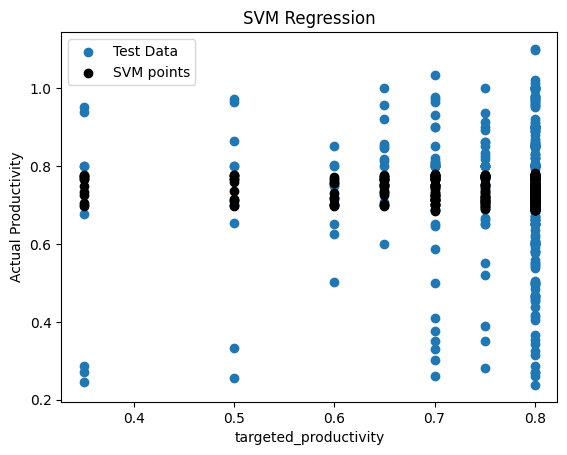

In [725]:
plt.scatter(data['targeted_productivity'][:len(y_test3)], y_test3, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test3)], y_pred3, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

60 - 40 SPLIT

In [726]:
model.fit(X_train4_nomulti, y_train4)

SVR()

In [727]:
y_pred4 = model.predict(X_test4_nomulti)
y_pred4

array([0.68798091, 0.70768677, 0.77624728, 0.77187513, 0.77179381,
       0.73321067, 0.72789162, 0.72789217, 0.74326949, 0.70328792,
       0.71032727, 0.69642066, 0.72023809, 0.74500918, 0.75174159,
       0.77633562, 0.73657643, 0.76637131, 0.70026263, 0.75706113,
       0.73659135, 0.71209752, 0.77532887, 0.74504686, 0.75120176,
       0.73930004, 0.77624543, 0.7297434 , 0.68917749, 0.77631751,
       0.72252009, 0.71672708, 0.76701826, 0.7737327 , 0.75052408,
       0.69721647, 0.77375639, 0.7202374 , 0.71672694, 0.77175701,
       0.77385934, 0.75678009, 0.77182519, 0.75572112, 0.71652491,
       0.7167278 , 0.7717572 , 0.77189478, 0.7151383 , 0.77622992,
       0.73425195, 0.72167421, 0.77180762, 0.75374932, 0.77180812,
       0.72872102, 0.72776289, 0.70557661, 0.77631694, 0.76060111,
       0.77626446, 0.77621268, 0.72187352, 0.75105359, 0.7123639 ,
       0.77181035, 0.71505598, 0.68927362, 0.70165868, 0.7098119 ,
       0.75594909, 0.71175012, 0.70963877, 0.70641383, 0.71444

In [728]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted    Actual
921    0.687981  0.268214
321    0.707687  0.800359
101    0.776247  0.681061
920    0.771875  0.325000
58     0.771794  0.667604
...         ...       ...
71     0.701239  0.800251
94     0.745588  0.800274
543    0.730656  1.000671
33     0.771878  0.782448
1174   0.760490  0.874028

[479 rows x 2 columns]

In [729]:
print(r2_score(y_test4,y_pred4))
print(metrics.mean_absolute_error(y_test4,y_pred4))
print(mean_squared_error(y_test4,y_pred4))

0.009736753185777491
0.12886503986634731
0.028947691835179805


In [730]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
print(rmse)

0.17014021228145862


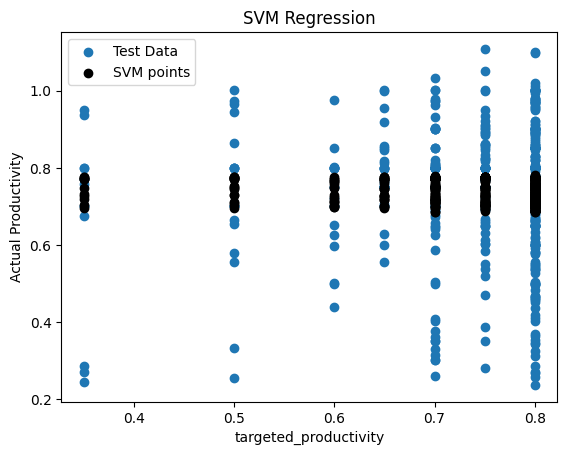

In [731]:
plt.scatter(data['targeted_productivity'][:len(y_test4)], y_test4, label='Test Data')
plt.scatter(data['targeted_productivity'][:len(y_test4)], y_pred4, color='black', linewidth=1, label='SVM points')
plt.xlabel('targeted_productivity')
plt.ylabel('Actual Productivity')
plt.title('SVM Regression')
plt.legend()
plt.show()

#DECISION TREE after MULTICOLLINEARITY checking

In [732]:
clf = DecisionTreeRegressor()

80 -20 SPLIT

In [733]:
clf = clf.fit(X_train1_nomulti,y_train1)

In [734]:
y_pred1 = clf.predict(X_test1_nomulti)
y_pred1

array([0.66237931, 0.8001626 , 0.68106061, 0.45521875, 0.6253125 ,
       0.80098039, 0.9217037 , 0.9217037 , 0.6502435 , 0.75039551,
       0.70027885, 0.98802469, 0.80049725, 0.98719697, 0.85050231,
       0.8189678 , 1.00040205, 0.60103709, 0.70013604, 0.90032111,
       1.00040205, 0.70035455, 0.884     , 1.05066667, 0.98719697,
       0.80027383, 0.75548611, 1.00023041, 0.60052857, 0.80964015,
       0.95018596, 0.80040196, 0.8299537 , 0.97186667, 0.7000638 ,
       0.26097879, 0.94669444, 0.80049725, 0.80034377, 0.58604167,
       0.8001171 , 0.85050231, 0.75927083, 0.90032111, 0.75065101,
       0.80040196, 0.3896875 , 0.91522917, 0.75077012, 0.85814394,
       0.65708333, 0.85044615, 0.77333333, 0.8       , 0.28395833,
       0.65019865, 0.37659722, 0.75065101, 0.940625  , 0.85279356,
       0.66183712, 0.51302083, 0.35063299, 0.93951389, 0.35063299,
       0.60869792, 0.79996322, 0.98788044, 0.46490643, 0.35063299,
       0.85022378, 0.89366319, 0.50080172, 0.75024303, 0.71220

In [735]:
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.13869225670186425
Mean Absolute Error: 0.09004014054930556
Mean Squared Error: 0.022869845020458766


In [736]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train1_nomulti,y_train1)
y_pred1 = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.23100479679440045
Mean Absolute Error: 0.09946444985416666
Mean Squared Error: 0.020418719389941338


In [737]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train1_nomulti,y_train1)
y_pred1 = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.18470350111795641
Mean Absolute Error: 0.10194425450416668
Mean Squared Error: 0.021648132993390367


In [738]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train1_nomulti,y_train1)
y_pred1 = clf.predict(X_test1_nomulti)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.3751855494047489
Mean Absolute Error: 0.08443242476458333
Mean Squared Error: 0.016590364782904668


In [739]:
y_pred_train1 = clf.predict(X_train1_nomulti)
print("R-squared:", metrics.r2_score(y_test1, y_pred1))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test1, y_pred1))
print("Mean Squared Error:", metrics.mean_squared_error(y_test1, y_pred1))

R-squared: 0.3751855494047489
Mean Absolute Error: 0.08443242476458333
Mean Squared Error: 0.016590364782904668


75 - 25 SPLIT

In [740]:
clf = clf.fit(X_train2_nomulti,y_train2)

In [741]:
y_pred2 = clf.predict(X_test2_nomulti)
y_pred2

array([0.53690175, 0.80024601, 0.67007576, 0.41083333, 0.67007576,
       0.67308333, 0.53690175, 0.53690175, 0.62657778, 0.75047368,
       0.85013677, 0.96422559, 0.80040196, 0.84646667, 0.85050231,
       0.82083333, 1.00023041, 0.60056812, 0.70010606, 0.95018596,
       1.00023041, 0.70010606, 0.84646667, 0.84646667, 0.91037879,
       0.53690175, 0.84646667, 1.00023041, 0.53690175, 0.82083333,
       0.95018596, 0.80040196, 0.84646667, 0.86076667, 0.70025078,
       0.53690175, 0.84646667, 0.80040196, 0.80040196, 0.67308333,
       0.8001171 , 0.85050231, 0.67308333, 0.95018596, 0.75047368,
       0.80040196, 0.41083333, 0.91522917, 0.80024601, 0.85814394,
       0.75047368, 0.80040196, 0.67308333, 0.8001171 , 0.41083333,
       0.75047368, 0.53690175, 0.70061613, 0.82083333, 0.84646667,
       0.67007576, 0.75555556, 0.53690175, 0.75555556, 0.53690175,
       0.67007576, 0.80024601, 0.91037879, 0.53690175, 0.53690175,
       0.85050231, 0.91037879, 0.62657778, 0.75047368, 0.75047

In [742]:
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.3255962353320113
Mean Absolute Error: 0.08781450740333334
Mean Squared Error: 0.018990608588346638


In [743]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)
clf = clf.fit(X_train2_nomulti,y_train2)
y_pred2 = clf.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.19941025576558047
Mean Absolute Error: 0.10136141139333335
Mean Squared Error: 0.0225438932418849


In [744]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train2_nomulti,y_train2)
y_pred2 = clf.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.15316629919361424
Mean Absolute Error: 0.10367016764666667
Mean Squared Error: 0.02384608181917888


In [745]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train2_nomulti,y_train2)
y_pred2 = clf.predict(X_test2_nomulti)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.32586969048591663
Mean Absolute Error: 0.08798297841666666
Mean Squared Error: 0.01898290833507649


In [746]:
y_pred_train2 = clf.predict(X_train2_nomulti)
print("R-squared:", metrics.r2_score(y_test2, y_pred2))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test2, y_pred2))

R-squared: 0.32586969048591663
Mean Absolute Error: 0.08798297841666666
Mean Squared Error: 0.01898290833507649


70 - 30 SPLIT

In [747]:
clf = clf.fit(X_train3_nomulti,y_train3)

In [748]:
y_pred3 = clf.predict(X_test3_nomulti)
y_pred3

array([0.53791944, 0.80037843, 0.66732954, 0.41083333, 0.66732954,
       0.664875  , 0.53791944, 0.53791944, 0.52815093, 0.75039551,
       0.80037843, 0.96666667, 0.8001171 , 0.8471    , 0.85022378,
       0.82083333, 1.00023041, 0.60056812, 0.70006407, 0.90064806,
       1.00023041, 0.70006407, 0.8471    , 0.8471    , 0.90676768,
       0.53791944, 0.8471    , 1.00023041, 0.53791944, 0.82083333,
       0.90064806, 0.80037843, 0.8471    , 0.80777462, 0.8001171 ,
       0.53791944, 0.8471    , 0.8001171 , 0.80037843, 0.664875  ,
       0.8001171 , 0.85050231, 0.664875  , 0.90064806, 0.75039551,
       0.80037843, 0.41083333, 0.91522917, 0.8001171 , 0.85814394,
       0.75039551, 0.8001171 , 0.664875  , 0.8001171 , 0.41083333,
       0.75039551, 0.53791944, 0.75039551, 0.82083333, 0.8471    ,
       0.66732954, 0.80777462, 0.53791944, 0.80777462, 0.53791944,
       0.66732954, 0.7500412 , 0.90676768, 0.53791944, 0.53791944,
       0.85022378, 0.90676768, 0.52815093, 0.75039551, 0.75039

In [749]:
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.28364013949640987
Mean Absolute Error: 0.09150557426805557
Mean Squared Error: 0.021410606643028865


In [750]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train3_nomulti,y_train3)
y_pred3 = clf.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.20078428001170412
Mean Absolute Error: 0.10542174342777777
Mean Squared Error: 0.023887007560090323


In [751]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train3_nomulti,y_train3)
y_pred3 = clf.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.13151803098469517
Mean Absolute Error: 0.10774902271527777
Mean Squared Error: 0.025957241381556563


In [752]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train3_nomulti,y_train3)
y_pred = clf.predict(X_test3_nomulti)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.13151803098469517
Mean Absolute Error: 0.10774902271527777
Mean Squared Error: 0.025957241381556563


In [753]:
y_pred_train3 = clf.predict(X_train3_nomulti)
print("R-squared:", metrics.r2_score(y_test3, y_pred3))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test3, y_pred3))
print("Mean Squared Error:", metrics.mean_squared_error(y_test3, y_pred3))

R-squared: 0.13151803098469517
Mean Absolute Error: 0.10774902271527777
Mean Squared Error: 0.025957241381556563


60 - 40 SPLIT

In [754]:
clf = clf.fit(X_train4_nomulti,y_train4)

In [755]:
y_pred4 = clf.predict(X_test4_nomulti)
y_pred4

array([0.52201241, 0.80016117, 0.66732954, 0.4078125 , 0.66732954,
       0.671875  , 0.52201241, 0.52201241, 0.50067463, 0.75042783,
       0.80016117, 0.96926667, 0.80016117, 0.84088889, 0.85050231,
       0.82083333, 1.00023041, 0.60056812, 0.70006407, 0.90014725,
       1.00023041, 0.70006407, 0.84088889, 0.84088889, 0.91037879,
       0.52201241, 0.84088889, 1.00023041, 0.52201241, 0.82083333,
       0.90014725, 0.80040196, 0.84088889, 0.76242424, 0.80016117,
       0.52201241, 0.84088889, 0.80016117, 0.80040196, 0.671875  ,
       0.80016117, 0.85050231, 0.671875  , 0.90014725, 0.75042783,
       0.80040196, 0.4078125 , 0.93649621, 0.80016117, 0.84053333,
       0.75042783, 0.85050231, 0.671875  , 0.80016117, 0.4078125 ,
       0.75042783, 0.52201241, 0.70061403, 0.82083333, 0.84088889,
       0.66732954, 0.84053333, 0.52201241, 0.84053333, 0.52201241,
       0.66732954, 0.80016117, 0.91037879, 0.52201241, 0.52201241,
       0.80062987, 0.91037879, 0.50067463, 0.75042783, 0.75042

In [756]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=3)

clf = clf.fit(X_train4_nomulti,y_train4)
y_pred4 = clf.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.1921565234451169
Mean Absolute Error: 0.10421659405114823
Mean Squared Error: 0.02361513878819964


In [757]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=2)

clf = clf.fit(X_train4_nomulti,y_train4)
y_pred = clf.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.1921565234451169
Mean Absolute Error: 0.10421659405114823
Mean Squared Error: 0.02361513878819964


In [758]:
clf = DecisionTreeRegressor(criterion="absolute_error", max_depth=6)

clf = clf.fit(X_train4_nomulti,y_train4)
y_pred4 = clf.predict(X_test4_nomulti)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4 ,y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4 ,y_pred4))

R-squared: 0.27840796873321805
Mean Absolute Error: 0.08964519092379958
Mean Squared Error: 0.021093808963457358


In [759]:
y_pred_train4 = clf.predict(X_train4_nomulti)
print("R-squared:", metrics.r2_score(y_test4, y_pred4))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test4, y_pred4))
print("Mean Squared Error:", metrics.mean_squared_error(y_test4, y_pred4))

R-squared: 0.27840796873321805
Mean Absolute Error: 0.08964519092379958
Mean Squared Error: 0.021093808963457358


#BAGGING after MULTICOLLINEARITY checking

In [760]:
rf = RandomForestRegressor()

80 - 20 SPLIT

In [761]:
rf.fit(X_train1_nomulti, y_train1)
y_pred = rf.predict(X_test1_nomulti)
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0160, R-squared: 0.3973, MAE: 0.0825


75 - 25 SPLIT

In [762]:
rf.fit(X_train2_nomulti, y_train2)
y_pred = rf.predict(X_test2_nomulti)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0193, R-squared: 0.3147, MAE: 0.0869


70 - 30 SPLIT

In [763]:
rf.fit(X_train3_nomulti, y_train3)
y_pred = rf.predict(X_test3_nomulti)
mse = mean_squared_error(y_test3, y_pred)
r2 = r2_score(y_test3, y_pred)
mae = mean_absolute_error(y_test3, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0191, R-squared: 0.3600, MAE: 0.0871


60 - 40 SPLIT

In [764]:
rf.fit(X_train4_nomulti, y_train4)
y_pred = rf.predict(X_test4_nomulti)
mse = mean_squared_error(y_test4, y_pred)
r2 = r2_score(y_test4, y_pred)
mae = mean_absolute_error(y_test4, y_pred)
print(f'Model 8 Random Forest Report:\n MSE: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0196, R-squared: 0.3303, MAE: 0.0885


#BOOSTING after MULTICOLLINEARITY checking

#XGBoost

80 - 20 SPLIT

In [765]:
model1 = xgb.XGBRegressor()
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [766]:
train_model1 = model1.fit(X_train1_nomulti, y_train1)
train_model2 = model2.fit(X_train1_nomulti, y_train1)

In [767]:
pred1 = train_model1.predict(X_test1_nomulti)
pred2 = train_model2.predict(X_test1_nomulti)

In [768]:
mse1 = mean_squared_error(y_test1, pred1)
r2_1 = r2_score(y_test1, pred1)
mae1 = mean_absolute_error(y_test1, pred1)

mse2 = mean_squared_error(y_test1, pred2)
r2_2 = r2_score(y_test1, pred2)
mae2 = mean_absolute_error(y_test1, pred2)

In [769]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0207, R-squared: 0.2197, MAE: 0.0915
Model 2 XGboost Report:
 MSE: 0.0170, R-squared: 0.3596, MAE: 0.0865


In [770]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train1_nomulti, y_train1)
pred3 = train_model3.predict(X_test1_nomulti)
mse3 = mean_squared_error(y_test1, pred1)
r2_3 = r2_score(y_test1, pred1)
mae3 = mean_absolute_error(y_test1, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0207, R-squared: 0.2197, MAE: 0.0915


In [771]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7, n_estimators=1000, max_depth=4)

In [772]:
train_model7 = xgb2.fit(X_train1_nomulti, y_train1)
pred7 = train_model7.predict(X_test1_nomulti)
mse7 = mean_squared_error(y_test1, pred7)
r2_7 = r2_score(y_test1, pred7)
mae7 = mean_absolute_error(y_test1, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0189, R-squared: 0.2884, MAE: 0.0908


In [773]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train1_nomulti, y_train1)
pred8 = rfc_model.predict(X_test1_nomulti)
mse8 = mean_squared_error(y_test1, pred8)
r2_8 = r2_score(y_test1, pred8)
mae8 = mean_absolute_error(y_test1, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0158, R-squared: 0.4045, MAE: 0.0814


75 - 25 SPLI

In [774]:
train_model1 = model1.fit(X_train2_nomulti, y_train2)
train_model2 = model2.fit(X_train2_nomulti, y_train2)

In [775]:
pred1 = train_model1.predict(X_test2_nomulti)
pred2 = train_model2.predict(X_test2_nomulti)

In [776]:
mse1 = mean_squared_error(y_test2, pred1)
r2_1 = r2_score(y_test2, pred1)
mae1 = mean_absolute_error(y_test2, pred1)

mse2 = mean_squared_error(y_test2, pred2)
r2_2 = r2_score(y_test2, pred2)
mae2 = mean_absolute_error(y_test2, pred2)

In [777]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0223, R-squared: 0.2079, MAE: 0.0954
Model 2 XGboost Report:
 MSE: 0.0206, R-squared: 0.2700, MAE: 0.0927


In [778]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train2_nomulti, y_train2)
pred3 = train_model3.predict(X_test2_nomulti)
mse3 = mean_squared_error(y_test2, pred1)
r2_3 = r2_score(y_test2, pred1)
mae3 = mean_absolute_error(y_test2, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0223, R-squared: 0.2079, MAE: 0.0954


In [779]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7, n_estimators=1000, max_depth=4)

In [780]:
train_model7 = xgb2.fit(X_train2_nomulti, y_train2)
pred7 = train_model7.predict(X_test2_nomulti)
mse7 = mean_squared_error(y_test2, pred7)
r2_7 = r2_score(y_test2, pred7)
mae7 = mean_absolute_error(y_test2, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0272, R-squared: 0.0324, MAE: 0.1062


In [781]:
#Let's train a fast RandomForest on the dataset
rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train2_nomulti, y_train2)
pred8 = rfc_model.predict(X_test2_nomulti)
mse8 = mean_squared_error(y_test2, pred8)
r2_8 = r2_score(y_test2, pred8)
mae8 = mean_absolute_error(y_test2, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0194, R-squared: 0.3098, MAE: 0.0884


70 - 30 SPLIT

In [782]:
train_model1 = model1.fit(X_train3_nomulti, y_train3)
train_model2 = model2.fit(X_train3_nomulti, y_train3)

In [783]:
pred1 = train_model1.predict(X_test3_nomulti)
pred2 = train_model2.predict(X_test3_nomulti)

In [784]:
mse1 = mean_squared_error(y_test3, pred1)
r2_1 = r2_score(y_test3, pred1)
mae1 = mean_absolute_error(y_test3, pred1)

mse2 = mean_squared_error(y_test3, pred2)
r2_2 = r2_score(y_test3, pred2)
mae2 = mean_absolute_error(y_test3, pred2)

In [785]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0212, R-squared: 0.2895, MAE: 0.0946
Model 2 XGboost Report:
 MSE: 0.0200, R-squared: 0.3322, MAE: 0.0911


In [786]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train3_nomulti, y_train3)
pred3 = train_model3.predict(X_test3_nomulti)
mse3 = mean_squared_error(y_test3, pred1)
r2_3 = r2_score(y_test3, pred1)
mae3 = mean_absolute_error(y_test3, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0212, R-squared: 0.2895, MAE: 0.0946


In [787]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7, n_estimators=1000, max_depth=4)

In [788]:
train_model7 = xgb2.fit(X_train3_nomulti, y_train3)
pred7 = train_model7.predict(X_test3_nomulti)
mse7 = mean_squared_error(y_test3, pred7)
r2_7 = r2_score(y_test3, pred7)
mae7 = mean_absolute_error(y_test3, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0257, R-squared: 0.1405, MAE: 0.1073


In [789]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train3_nomulti, y_train3)
pred8 = rfc_model.predict(X_test3_nomulti)
mse8 = mean_squared_error(y_test3, pred8)
r2_8 = r2_score(y_test3, pred8)
mae8 = mean_absolute_error(y_test3, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0191, R-squared: 0.3615, MAE: 0.0882


60 - 40 SPLIT

In [790]:
train_model1 = model1.fit(X_train4_nomulti, y_train4)
train_model2 = model2.fit(X_train4_nomulti, y_train4)

In [791]:
pred1 = train_model1.predict(X_test4_nomulti)
pred2 = train_model2.predict(X_test4_nomulti)

In [792]:
mse1 = mean_squared_error(y_test4, pred1)
r2_1 = r2_score(y_test4, pred1)
mae1 = mean_absolute_error(y_test4, pred1)

mse2 = mean_squared_error(y_test4, pred2)
r2_2 = r2_score(y_test4, pred2)
mae2 = mean_absolute_error(y_test4, pred2)

In [793]:
print(f'Model 1 XGboost Report:\n MSE: {mse1:.4f}, R-squared: {r2_1:.4f}, MAE: {mae1:.4f}')
print(f'Model 2 XGboost Report:\n MSE: {mse2:.4f}, R-squared: {r2_2:.4f}, MAE: {mae2:.4f}')

Model 1 XGboost Report:
 MSE: 0.0224, R-squared: 0.2324, MAE: 0.0947
Model 2 XGboost Report:
 MSE: 0.0205, R-squared: 0.2976, MAE: 0.0924


In [794]:
model3 = xgb.XGBRegressor()
train_model3 = model3.fit(X_train4_nomulti, y_train4)
pred3 = train_model3.predict(X_test4_nomulti)
mse3 = mean_squared_error(y_test4, pred1)
r2_3 = r2_score(y_test4, pred1)
mae3 = mean_absolute_error(y_test4, pred1)
print(f'Model 3 XGboost Report:\n MSE: {mse3:.4f}, R-squared: {r2_3:.4f}, MAE: {mae3:.4f}')

Model 3 XGboost Report:
 MSE: 0.0224, R-squared: 0.2324, MAE: 0.0947


In [795]:
xgb2 = xgb.XGBRegressor(learning_rate =0.7, n_estimators=1000, max_depth=4)

In [796]:
train_model7 = xgb2.fit(X_train4_nomulti, y_train4)
pred7 = train_model7.predict(X_test4_nomulti)
mse7 = mean_squared_error(y_test4, pred7)
r2_7 = r2_score(y_test4, pred7)
mae7 = mean_absolute_error(y_test4, pred7)
print(f'Model 7 XGboost Report:\n MSE: {mse7:.4f}, R-squared: {r2_7:.4f}, MAE: {mae7:.4f}')

Model 7 XGboost Report:
 MSE: 0.0266, R-squared: 0.0917, MAE: 0.1085


In [797]:
#Let's train a fast RandomForest on the dataset

rfc = RandomForestRegressor()
rfc_model = rfc.fit(X_train4_nomulti, y_train4)
pred8 = rfc_model.predict(X_test4_nomulti)
mse8 = mean_squared_error(y_test4, pred8)
r2_8 = r2_score(y_test4, pred8)
mae8 = mean_absolute_error(y_test4, pred8)
print(f'Model 8 Random Forest Report:\n MSE: {mse8:.4f}, R-squared: {r2_8:.4f}, MAE: {mae8:.4f}')

Model 8 Random Forest Report:
 MSE: 0.0196, R-squared: 0.3286, MAE: 0.0885


#ADABoost

In [798]:
estimator = DecisionTreeRegressor(max_depth=3, random_state=0)
adaboost = AdaBoostRegressor(estimator=estimator,  n_estimators=3, random_state=0)

80 - 20 SPLIT

In [799]:
adaboost.fit(X_train1_nomulti,y_train1)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [800]:
y_pred1 = adaboost.predict(X_test1_nomulti)
y_pred1

array([0.62432679, 0.79366738, 0.66252971, 0.67864447, 0.66252971,
       0.67864447, 0.62432679, 0.62432679, 0.58540526, 0.65812533,
       0.79902022, 0.58540526, 0.79902022, 0.79632295, 0.84535191,
       0.79632295, 0.9444428 , 0.65812533, 0.62432679, 0.9444428 ,
       0.9444428 , 0.62432679, 0.79632295, 0.79632295, 0.80020569,
       0.58540526, 0.65812533, 0.9444428 , 0.62432679, 0.79632295,
       0.9444428 , 0.79902022, 0.79632295, 0.66252971, 0.79366738,
       0.58540526, 0.79632295, 0.79902022, 0.79902022, 0.65812533,
       0.79902022, 0.84535191, 0.67864447, 0.9444428 , 0.65812533,
       0.79902022, 0.65812533, 0.67864447, 0.79366738, 0.66252971,
       0.65812533, 0.80849333, 0.65812533, 0.79902022, 0.65812533,
       0.67770523, 0.62432679, 0.72625097, 0.79632295, 0.79632295,
       0.66252971, 0.66252971, 0.58540526, 0.79632295, 0.58540526,
       0.66252971, 0.79366738, 0.80020569, 0.58540526, 0.58540526,
       0.84535191, 0.80020569, 0.58540526, 0.67770523, 0.67770

In [801]:
mse = mean_squared_error(y_test1, y_pred1)
print("MSE:", mse)
r2 = r2_score(y_test1, y_pred1)
print("R-squared:", r2)
mae = mean_absolute_error(y_test1, y_pred1)
print("MAE:", mae)

MSE: 0.0196080000089619
R-squared: 0.2615375301756191
MAE: 0.10205728156656632


75 - 25 SPLIT

In [802]:
adaboost.fit(X_train2_nomulti,y_train2)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [803]:
y_pred2 = adaboost.predict(X_test2_nomulti)
y_pred2

array([0.65865115, 0.7882265 , 0.69876442, 0.71180522, 0.69876442,
       0.69876442, 0.65865115, 0.65865115, 0.58548021, 0.72430323,
       0.80230427, 0.58548021, 0.80230427, 0.71180522, 0.80245988,
       0.82209827, 0.94708203, 0.69876442, 0.65865115, 0.94708203,
       0.94708203, 0.65865115, 0.71180522, 0.71180522, 0.82209827,
       0.58548021, 0.69876442, 0.94708203, 0.65865115, 0.71180522,
       0.94708203, 0.80230427, 0.71180522, 0.69876442, 0.7882265 ,
       0.58548021, 0.69876442, 0.80230427, 0.7882265 , 0.69876442,
       0.80230427, 0.80245988, 0.69876442, 0.94708203, 0.72430323,
       0.80230427, 0.69876442, 0.82209827, 0.80230427, 0.69876442,
       0.69876442, 0.80245988, 0.69876442, 0.80230427, 0.69876442,
       0.65865115, 0.65865115, 0.72430323, 0.71180522, 0.69876442,
       0.69876442, 0.69876442, 0.58548021, 0.69876442, 0.58548021,
       0.69876442, 0.80230427, 0.71180522, 0.58548021, 0.58548021,
       0.80245988, 0.71180522, 0.58548021, 0.72430323, 0.72430

In [804]:
mse = mean_squared_error(y_test2, y_pred2)
print("MSE:", mse)
r2 = r2_score(y_test2, y_pred2)
print("R-squared:", r2)
mae = mean_absolute_error(y_test2, y_pred2)
print("MAE:", mae)

MSE: 0.02112517697040886
R-squared: 0.2497924007099135
MAE: 0.10205901340972899


In [805]:
adaboost.fit(X_train3_nomulti,y_train3)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [806]:
y_pred3 = adaboost.predict(X_test3_nomulti)
y_pred3

array([0.66145675, 0.77838277, 0.72644748, 0.66146532, 0.66146532,
       0.66146532, 0.66145675, 0.66145675, 0.57118569, 0.71124787,
       0.81081927, 0.6118428 , 0.81081927, 0.78857957, 0.81568962,
       0.79360801, 0.95336198, 0.66145675, 0.61471414, 0.95336198,
       0.95336198, 0.61471414, 0.78857957, 0.78857957, 0.79360801,
       0.57118569, 0.66145675, 0.95336198, 0.61471414, 0.79360801,
       0.95336198, 0.81081927, 0.78857957, 0.78813081, 0.77838277,
       0.57118569, 0.78857957, 0.81081927, 0.81081927, 0.66145675,
       0.81081927, 0.81568962, 0.66146532, 0.95336198, 0.71124787,
       0.81081927, 0.66145675, 0.79360801, 0.77838277, 0.72644748,
       0.66145675, 0.81081927, 0.66145675, 0.81081927, 0.66145675,
       0.6118428 , 0.61471414, 0.77113269, 0.79360801, 0.78857957,
       0.72644748, 0.72644748, 0.57118569, 0.72644748, 0.57118569,
       0.66146532, 0.77838277, 0.79360801, 0.57118569, 0.57118569,
       0.81568962, 0.72644748, 0.57118569, 0.71124787, 0.71124

In [807]:
mse = mean_squared_error(y_test3, y_pred3)
print("MSE:", mse)
r2 = r2_score(y_test3, y_pred3)
print("R-squared:", r2)
mae = mean_absolute_error(y_test3, y_pred3)
print("MAE:", mae)

MSE: 0.02190575039182141
R-squared: 0.2670735324530854
MAE: 0.10685974736696163


In [808]:
adaboost.fit(X_train4_nomulti,y_train4)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
                  n_estimators=3, random_state=0)

In [809]:
y_pred4 = adaboost.predict(X_test4_nomulti)
y_pred4

array([0.55197139, 0.76467577, 0.67216122, 0.76901153, 0.67216122,
       0.66274653, 0.76901153, 0.8163958 , 0.65703579, 0.76467577,
       0.76467577, 0.85393657, 0.8163958 , 0.76901153, 0.76467577,
       0.8163958 , 0.92108074, 0.65703579, 0.6476477 , 0.92108074,
       0.92108074, 0.65703579, 0.8163958 , 0.8163958 , 0.8163958 ,
       0.76901153, 0.66274653, 0.92108074, 0.55197139, 0.76901153,
       0.76467577, 0.76467577, 0.76901153, 0.67216122, 0.76467577,
       0.65703579, 0.76901153, 0.79012855, 0.76467577, 0.66274653,
       0.79012855, 0.76467577, 0.66274653, 0.92108074, 0.76467577,
       0.76467577, 0.66274653, 0.8163958 , 0.76467577, 0.67216122,
       0.75008376, 0.79012855, 0.66274653, 0.76467577, 0.66274653,
       0.67216122, 0.65703579, 0.7756641 , 0.76901153, 0.66274653,
       0.67216122, 0.67216122, 0.65703579, 0.67216122, 0.65703579,
       0.67216122, 0.76467577, 0.8163958 , 0.65703579, 0.65703579,
       0.8163958 , 0.67216122, 0.6476477 , 0.76467577, 0.76467

In [810]:
mse = mean_squared_error(y_test4, y_pred4)
print("MSE:", mse)
r2 = r2_score(y_test4, y_pred4)
print("R-squared:", r2)
mae = mean_absolute_error(y_test4, y_pred4)
print("MAE:", mae)

MSE: 0.023114904260370262
R-squared: 0.20926890223225336
MAE: 0.11027717054344906


#NEURAL NETWORK BEFORE MULTICOLLINEARITY CHECKING

In [811]:
import tensorflow as tf

80 - 20 TRAIN_test_SPLIT

    optimizer = Adam


In [812]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.8190 - mae: 0.8190 - val_loss: 0.1766 - val_mae: 0.1766 - learning_rate: 0.0100
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1597 - mae: 0.1597 - val_loss: 0.1398 - val_mae: 0.1398 - learning_rate: 0.0100
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.1405 - val_mae: 0.1405 - learning_rate: 0.0100
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1341 - mae: 0.1341 - val_loss: 0.1370 - val_mae: 0.1370 - learning_rate: 0.0100
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1304 - mae: 0.1304 - val_loss: 0.1427 - val_mae: 0.1427 - learning_rate: 0.0100
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1318 - mae: 0.1318 - val_loss: 0.1452 - val_mae: 0.1452 - learning_rate: 0.0100
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1309 - mae: 0.1309 - val_loss: 0.1520 - val_mae: 0.1520 - learning_rate: 0.0100
Epoch 8/50
12/12 ━━━━━━━━━━━━━

In [813]:
model.evaluate(X_test1, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1684 - mae: 0.1684 


[0.16822251677513123, 0.16822251677513123]

In [814]:
model.summary();

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

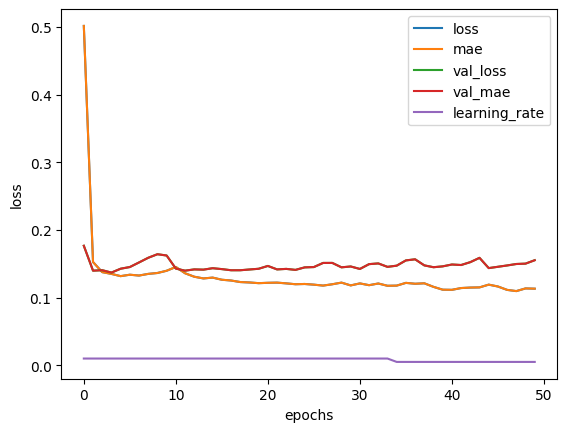

In [815]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 100 :

optimizer = Adam

In [816]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4583 - mae: 0.4583 - val_loss: 0.2021 - val_mae: 0.2021 - learning_rate: 0.0100
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1773 - mae: 0.1773 - val_loss: 0.1589 - val_mae: 0.1589 - learning_rate: 0.0100
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1453 - mae: 0.1453 - val_loss: 0.1433 - val_mae: 0.1433 - learning_rate: 0.0100
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1372 - mae: 0.1372 - val_loss: 0.1526 - val_mae: 0.1526 - learning_rate: 0.0100
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1395 - mae: 0.1395 - val_loss: 0.1579 - val_mae: 0.1579 - learning_rate: 0.0100
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.1645 - val_mae: 0.1645 - learning_rate: 0.0100
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1485 - mae: 0.1485 - val_loss: 0.1518 - val_mae: 0.1518 - learning_rate: 0.0100
Epoch 8/100
12/12 ━━━━━━

In [817]:
model.evaluate(X_test1, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3910 - mae: 0.3910 


[0.39179250597953796, 0.39179250597953796]

In [818]:
model.summary();

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

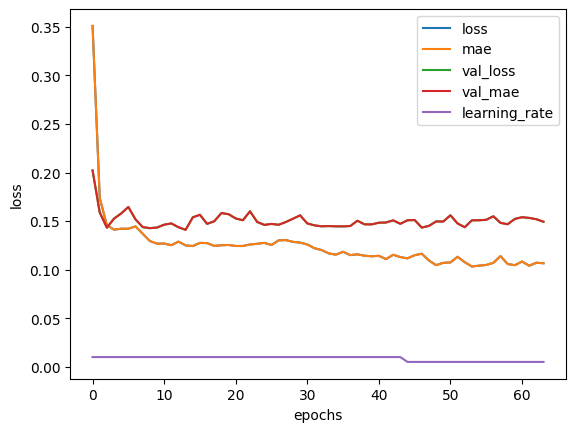

In [819]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 150 :

optimizer = Adam

In [820]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6189 - mae: 0.6189 - val_loss: 0.1827 - val_mae: 0.1827 - learning_rate: 0.0100
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1714 - mae: 0.1714 - val_loss: 0.1453 - val_mae: 0.1453 - learning_rate: 0.0100
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1385 - mae: 0.1385 - val_loss: 0.1373 - val_mae: 0.1373 - learning_rate: 0.0100
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.1414 - val_mae: 0.1414 - learning_rate: 0.0100
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1322 - mae: 0.1322 - val_loss: 0.1420 - val_mae: 0.1420 - learning_rate: 0.0100
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1297 - mae: 0.1297 - val_loss: 0.1475 - val_mae: 0.1475 - learning_rate: 0.0100
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1329 - mae: 0.1329 - val_loss: 0.1466 - val_mae: 0.1466 - learning_rate: 0.0100
Epoch 8/150
12/12 ━━━━━━

In [821]:
model.evaluate(X_test1, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2832 - mae: 0.2832 


[0.28067466616630554, 0.28067466616630554]

In [822]:
model.summary();

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

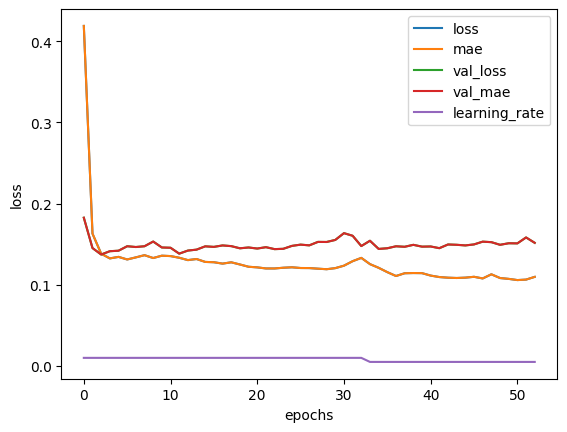

In [823]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 300 :

optimizer = Adam

In [824]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_scaled, y_train1, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5008 - mae: 0.5008 - val_loss: 0.1837 - val_mae: 0.1837 - learning_rate: 0.0100
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2030 - mae: 0.2030 - val_loss: 0.1510 - val_mae: 0.1510 - learning_rate: 0.0100
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.1489 - val_mae: 0.1489 - learning_rate: 0.0100
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1382 - mae: 0.1382 - val_loss: 0.1442 - val_mae: 0.1442 - learning_rate: 0.0100
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1325 - mae: 0.1325 - val_loss: 0.1368 - val_mae: 0.1368 - learning_rate: 0.0100
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1285 - mae: 0.1285 - val_loss: 0.1369 - val_mae: 0.1369 - learning_rate: 0.0100
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1240 - mae: 0.1240 - val_loss: 0.1369 - val_mae: 0.1369 - learning_rate: 0.0100
Epoch 8/300
12/12 ━━━━━━

In [825]:
model.evaluate(X_test1, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0196 - mae: 1.0196 


[1.0210944414138794, 1.0210944414138794]

In [826]:
model.summary();

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

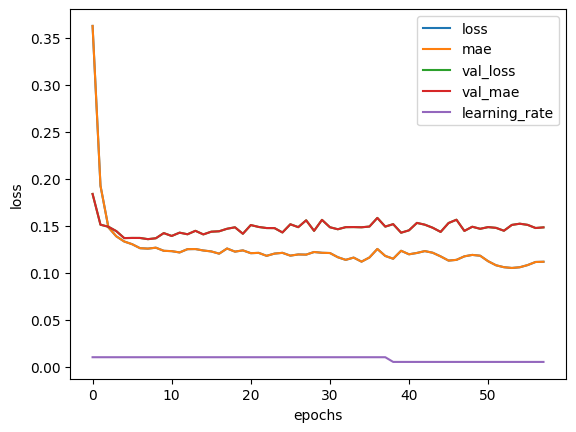

In [827]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

75-25 Train Test Split

Epochs = 50 :

optimizer = Adam

In [828]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3300 - mae: 0.3300 - val_loss: 0.1759 - val_mae: 0.1759 - learning_rate: 0.0100
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1621 - mae: 0.1621 - val_loss: 0.1475 - val_mae: 0.1475 - learning_rate: 0.0100
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1476 - mae: 0.1476 - val_loss: 0.1383 - val_mae: 0.1383 - learning_rate: 0.0100
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1423 - mae: 0.1423 - val_loss: 0.1410 - val_mae: 0.1410 - learning_rate: 0.0100
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1411 - mae: 0.1411 - val_loss: 0.1636 - val_mae: 0.1636 - learning_rate: 0.0100
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1482 - mae: 0.1482 - val_loss: 0.1601 - val_mae: 0.1601 - learning_rate: 0.0100
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1452 - mae: 0.1452 - val_loss: 0.1521 - val_mae: 0.1521 - learning_rate: 0.0100
Epoch 8/50
11/11 ━━━━━━━━━━━━━

In [829]:
model.evaluate(X_test2, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5487 - mae: 0.5487 


[0.5574419498443604, 0.5574419498443604]

In [830]:
model.summary();

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                     │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

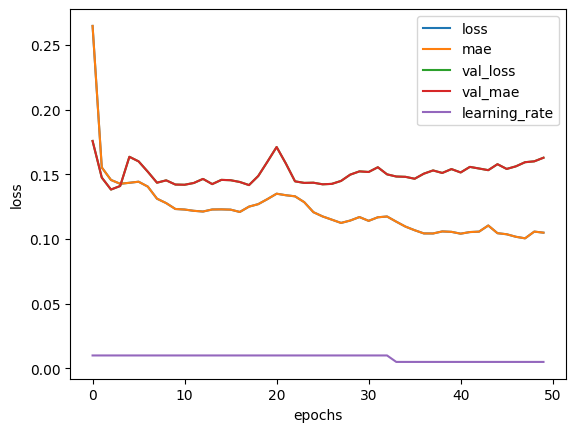

In [831]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 100 :

optimizer = Adam

In [832]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3402 - mae: 0.3402 - val_loss: 0.1700 - val_mae: 0.1700 - learning_rate: 0.0100
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1699 - mae: 0.1699 - val_loss: 0.1448 - val_mae: 0.1448 - learning_rate: 0.0100
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1401 - mae: 0.1401 - val_loss: 0.1399 - val_mae: 0.1399 - learning_rate: 0.0100
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1395 - mae: 0.1395 - val_loss: 0.1480 - val_mae: 0.1480 - learning_rate: 0.0100
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1438 - mae: 0.1438 - val_loss: 0.1383 - val_mae: 0.1383 - learning_rate: 0.0100
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1415 - mae: 0.1415 - val_loss: 0.1439 - val_mae: 0.1439 - learning_rate: 0.0100
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1384 - mae: 0.1384 - val_loss: 0.1542 - val_mae: 0.1542 - learning_rate: 0.0100
Epoch 8/100
11/11 ━━━━━━

In [833]:
model.evaluate(X_test2, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2717 - mae: 0.2717 


[0.26865559816360474, 0.26865559816360474]

In [834]:
model.summary();

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

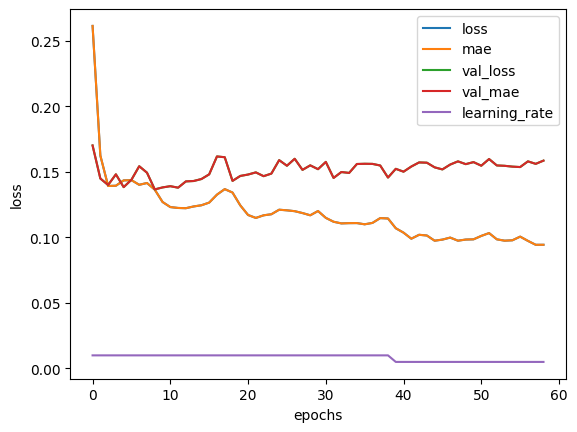

In [835]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 150 :

optimizer = Adam

In [836]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3324 - mae: 0.3324 - val_loss: 0.1760 - val_mae: 0.1760 - learning_rate: 0.0100
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1654 - mae: 0.1654 - val_loss: 0.1383 - val_mae: 0.1383 - learning_rate: 0.0100
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1428 - mae: 0.1428 - val_loss: 0.1330 - val_mae: 0.1330 - learning_rate: 0.0100
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1316 - mae: 0.1316 - val_loss: 0.1319 - val_mae: 0.1319 - learning_rate: 0.0100
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1323 - mae: 0.1323 - val_loss: 0.1319 - val_mae: 0.1319 - learning_rate: 0.0100
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1340 - mae: 0.1340 - val_loss: 0.1357 - val_mae: 0.1357 - learning_rate: 0.0100
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1339 - mae: 0.1339 - val_loss: 0.1377 - val_mae: 0.1377 - learning_rate: 0.0100
Epoch 8/150
11/11 ━━━━━━

In [837]:
model.evaluate(X_test2, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1299 - mae: 0.1299 


[0.13381916284561157, 0.13381916284561157]

In [838]:
model.summary();

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

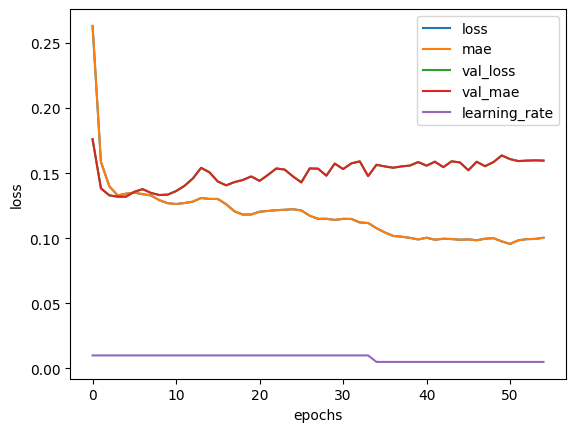

In [839]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs = 300 :

optimizer = Adam


In [840]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)  # Assuming X_train2 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])


# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_scaled, y_train2, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3873 - mae: 0.3873 - val_loss: 0.1963 - val_mae: 0.1963 - learning_rate: 0.0100
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1750 - mae: 0.1750 - val_loss: 0.1506 - val_mae: 0.1506 - learning_rate: 0.0100
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1433 - mae: 0.1433 - val_loss: 0.1483 - val_mae: 0.1483 - learning_rate: 0.0100
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1395 - mae: 0.1395 - val_loss: 0.1375 - val_mae: 0.1375 - learning_rate: 0.0100
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1326 - mae: 0.1326 - val_loss: 0.1393 - val_mae: 0.1393 - learning_rate: 0.0100
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1287 - mae: 0.1287 - val_loss: 0.1359 - val_mae: 0.1359 - learning_rate: 0.0100
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1284 - mae: 0.1284 - val_loss: 0.1373 - val_mae: 0.1373 - learning_rate: 0.0100
Epoch 8/300
11/11 ━━━━━━

In [841]:
model.evaluate(X_test2, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4884 - mae: 0.4884 


[0.4811638295650482, 0.4811638295650482]

In [842]:
model.summary();

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

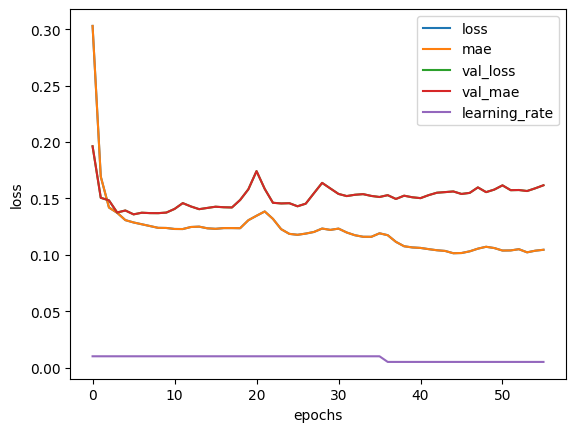

In [843]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

70-30 Train Test Split

Epochs=50

optimizer=Adam

In [844]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])


# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.7085 - mae: 0.7085 - val_loss: 0.1971 - val_mae: 0.1971 - learning_rate: 0.0100
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1848 - mae: 0.1848 - val_loss: 0.1817 - val_mae: 0.1817 - learning_rate: 0.0100
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1597 - mae: 0.1597 - val_loss: 0.1421 - val_mae: 0.1421 - learning_rate: 0.0100
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.1454 - val_mae: 0.1454 - learning_rate: 0.0100
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1400 - mae: 0.1400 - val_loss: 0.1384 - val_mae: 0.1384 - learning_rate: 0.0100
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1312 - mae: 0.1312 - val_loss: 0.1364 - val_mae: 0.1364 - learning_rate: 0.0100
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1282 - mae: 0.1282 - val_loss: 0.1391 - val_mae: 0.1391 - learning_rate: 0.0100
Epoch 8/50
10/10 ━━━━━━━━━━━━

In [845]:
model.evaluate(X_test3, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2103 - mae: 0.2103 


[0.2174692302942276, 0.2174692302942276]

In [846]:
model.summary();

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

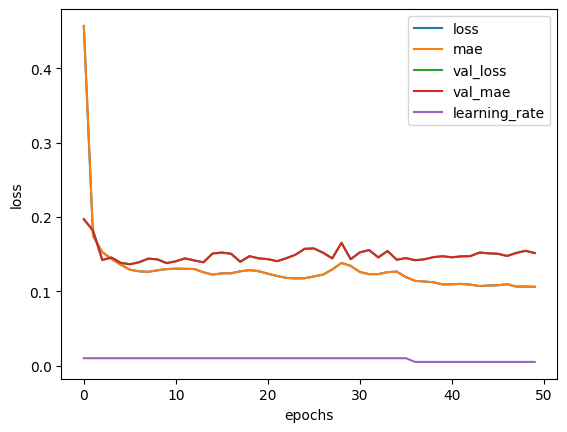

In [847]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=100

optimizer=Adam

In [848]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.5704 - mae: 0.5704 - val_loss: 0.2118 - val_mae: 0.2118 - learning_rate: 0.0100
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1857 - mae: 0.1857 - val_loss: 0.1556 - val_mae: 0.1556 - learning_rate: 0.0100
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1476 - mae: 0.1476 - val_loss: 0.1575 - val_mae: 0.1575 - learning_rate: 0.0100
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1483 - mae: 0.1483 - val_loss: 0.1482 - val_mae: 0.1482 - learning_rate: 0.0100
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1407 - mae: 0.1407 - val_loss: 0.1380 - val_mae: 0.1380 - learning_rate: 0.0100
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.1409 - val_mae: 0.1409 - learning_rate: 0.0100
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1328 - mae: 0.1328 - val_loss: 0.1363 - val_mae: 0.1363 - learning_rate: 0.0100
Epoch 8/100
10/10 ━━━━━━

In [849]:
model.evaluate(X_test3, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8716 - mae: 0.8716 


[0.8770826458930969, 0.8770826458930969]

In [850]:
model.summary();

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

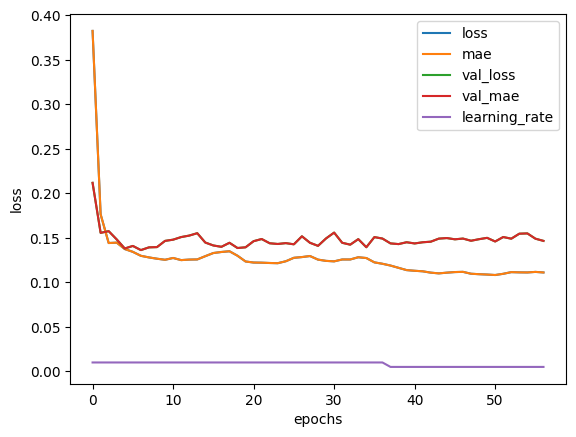

In [851]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Epochs**150

optimizer=Adam

In [852]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)  # Assuming X_train3 is a NumPy array
tf.random.set_seed(42)

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_scaled, y_train3, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.5613 - mae: 0.5613 - val_loss: 0.1804 - val_mae: 0.1804 - learning_rate: 0.0100
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1727 - mae: 0.1727 - val_loss: 0.1446 - val_mae: 0.1446 - learning_rate: 0.0100
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.1419 - val_mae: 0.1419 - learning_rate: 0.0100
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1355 - mae: 0.1355 - val_loss: 0.1416 - val_mae: 0.1416 - learning_rate: 0.0100
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1345 - mae: 0.1345 - val_loss: 0.1412 - val_mae: 0.1412 - learning_rate: 0.0100
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1320 - mae: 0.1320 - val_loss: 0.1401 - val_mae: 0.1401 - learning_rate: 0.0100
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1304 - mae: 0.1304 - val_loss: 0.1445 - val_mae: 0.1445 - learning_rate: 0.0100
Epoch 8/150
10/10 ━━━━━━

In [853]:
model.evaluate(X_test3, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2009 - mae: 0.2009 


[0.20218105614185333, 0.20218105614185333]

In [854]:
model.summary();

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_125 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

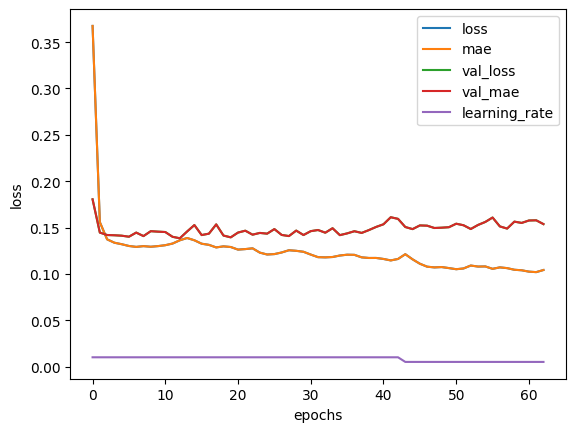

In [855]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

60-40 Train Test Split

Epochs=50

optimizer=adam

In [856]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)  # Assuming X_train4 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_scaled, y_train4, epochs=50, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.5297 - mae: 0.5297 - val_loss: 0.2158 - val_mae: 0.2158 - learning_rate: 0.0100
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2033 - mae: 0.2033 - val_loss: 0.1606 - val_mae: 0.1606 - learning_rate: 0.0100
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1428 - mae: 0.1428 - val_loss: 0.1471 - val_mae: 0.1471 - learning_rate: 0.0100
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1346 - mae: 0.1346 - val_loss: 0.1418 - val_mae: 0.1418 - learning_rate: 0.0100
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1346 - mae: 0.1346 - val_loss: 0.1437 - val_mae: 0.1437 - learning_rate: 0.0100
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1343 - mae: 0.1343 - val_loss: 0.1407 - val_mae: 0.1407 - learning_rate: 0.0100
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1334 - mae: 0.1334 - val_loss: 0.1406 - val_mae: 0.1406 - learning_rate: 0.0100
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [857]:
model.evaluate(X_test4, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3801 - mae: 0.3801 


[0.37971267104148865, 0.37971267104148865]

In [858]:
model.summary();

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_130 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

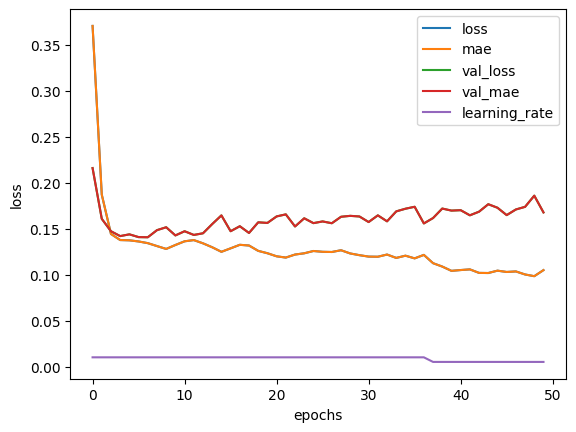

In [859]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150

optimizer=Adam

In [860]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_scaled, y_train4, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3986 - mae: 0.3986 - val_loss: 0.2176 - val_mae: 0.2176 - learning_rate: 0.0100
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1840 - mae: 0.1840 - val_loss: 0.1439 - val_mae: 0.1439 - learning_rate: 0.0100
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1485 - mae: 0.1485 - val_loss: 0.1600 - val_mae: 0.1600 - learning_rate: 0.0100
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1347 - mae: 0.1347 - val_loss: 0.1468 - val_mae: 0.1468 - learning_rate: 0.0100
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1319 - mae: 0.1319 - val_loss: 0.1423 - val_mae: 0.1423 - learning_rate: 0.0100
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.1436 - val_mae: 0.1436 - learning_rate: 0.0100
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1296 - mae: 0.1296 - val_loss: 0.1486 - val_mae: 0.1486 - learning_rate: 0.0100
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

In [861]:
model.evaluate(X_test4, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1278 - mae: 0.1278 


[0.13116148114204407, 0.13116148114204407]

In [862]:
model.evaluate(X_test4, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1278 - mae: 0.1278 


[0.13116148114204407, 0.13116148114204407]

In [863]:
model.summary();

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

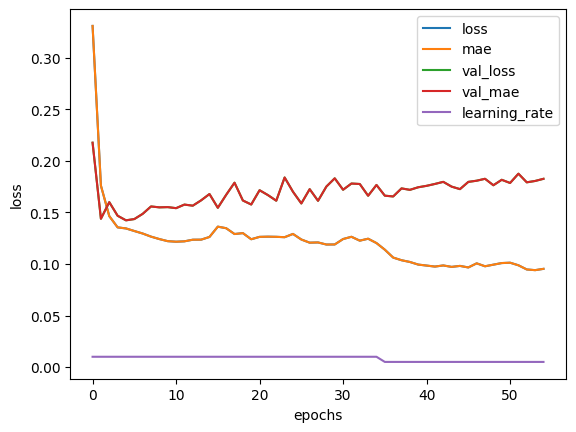

In [864]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300

optimizer=Adam

In [865]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)  # Assuming X_train4 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_scaled, y_train4, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3734 - mae: 0.3734 - val_loss: 0.2088 - val_mae: 0.2088 - learning_rate: 0.0100
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1874 - mae: 0.1874 - val_loss: 0.1528 - val_mae: 0.1528 - learning_rate: 0.0100
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1467 - mae: 0.1467 - val_loss: 0.1611 - val_mae: 0.1611 - learning_rate: 0.0100
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1377 - mae: 0.1377 - val_loss: 0.1583 - val_mae: 0.1583 - learning_rate: 0.0100
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1342 - mae: 0.1342 - val_loss: 0.1455 - val_mae: 0.1455 - learning_rate: 0.0100
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1297 - mae: 0.1297 - val_loss: 0.1433 - val_mae: 0.1433 - learning_rate: 0.0100
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1295 - mae: 0.1295 - val_loss: 0.1456 - val_mae: 0.1456 - learning_rate: 0.0100
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

In [866]:
model.evaluate(X_test4, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2530 - mae: 0.2530 


[0.2541131377220154, 0.2541131377220154]

In [867]:
model.summary();

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 30)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 1,669 (6.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,340 (13.05 KB)

Text(0.5, 0, 'epochs')

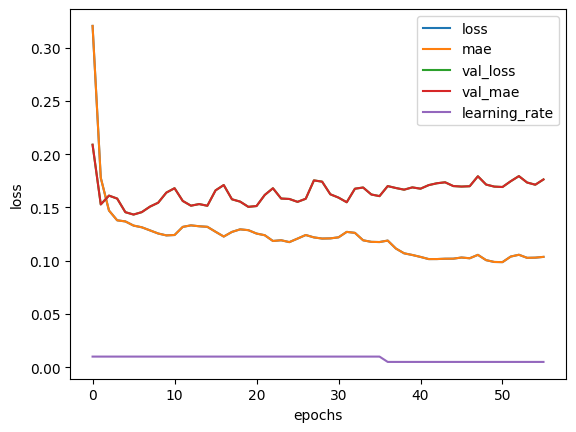

In [868]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#NEURAL NETWORKS AFTER MULTICOLLINEARITY CHECKING

80-20 Train Test Split

Epochs=100

In [871]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_nomulti_scaled = scaler.fit_transform(X_train1_nomulti)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_nomulti_scaled, y_train1, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.4139 - mae: 0.4139 - val_loss: 0.1551 - val_mae: 0.1551 - learning_rate: 0.0100
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1491 - mae: 0.1491 - val_loss: 0.1342 - val_mae: 0.1342 - learning_rate: 0.0100
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1230 - mae: 0.1230 - val_loss: 0.1268 - val_mae: 0.1268 - learning_rate: 0.0100
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1162 - mae: 0.1162 - val_loss: 0.1220 - val_mae: 0.1220 - learning_rate: 0.0100
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1102 - mae: 0.1102 - val_loss: 0.1202 - val_mae: 0.1202 - learning_rate: 0.0100
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1057 - mae: 0.1057 - val_loss: 0.1176 - val_mae: 0.1176 - learning_rate: 0.0100
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1037 - mae: 0.1037 - val_loss: 0.1150 - val_mae: 0.1150 - learning_rate: 0.0100
Epoch 8/100
12/12 ━━━━━━

In [872]:
model.evaluate(X_test1_nomulti, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4618 - mae: 0.4618 


[0.46492090821266174, 0.46492090821266174]

In [873]:
model.summary();

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

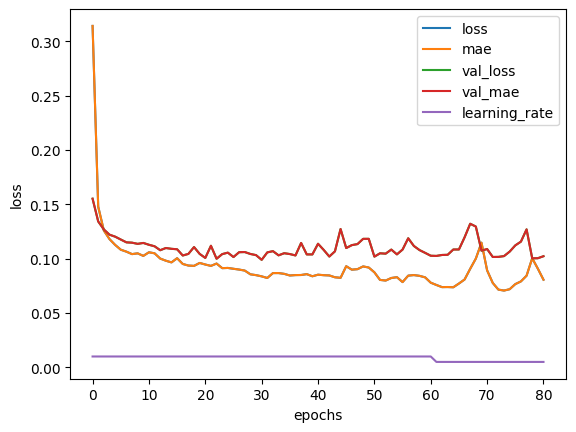

In [874]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150

In [875]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_nomulti_scaled = scaler.fit_transform(X_train1_nomulti)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_nomulti_scaled, y_train1, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.4343 - mae: 0.4343 - val_loss: 0.1761 - val_mae: 0.1761 - learning_rate: 0.0100
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1733 - mae: 0.1733 - val_loss: 0.1331 - val_mae: 0.1331 - learning_rate: 0.0100
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1358 - mae: 0.1358 - val_loss: 0.1279 - val_mae: 0.1279 - learning_rate: 0.0100
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1197 - mae: 0.1197 - val_loss: 0.1226 - val_mae: 0.1226 - learning_rate: 0.0100
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1127 - mae: 0.1127 - val_loss: 0.1242 - val_mae: 0.1242 - learning_rate: 0.0100
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1131 - mae: 0.1131 - val_loss: 0.1217 - val_mae: 0.1217 - learning_rate: 0.0100
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077 - mae: 0.1077 - val_loss: 0.1183 - val_mae: 0.1183 - learning_rate: 0.0100
Epoch 8/150
12/12 ━━━━━━

In [876]:
model.evaluate(X_test1_nomulti, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9433 - mae: 0.9433 


[0.9487147927284241, 0.9487147927284241]

In [877]:
model.summary();

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_155 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

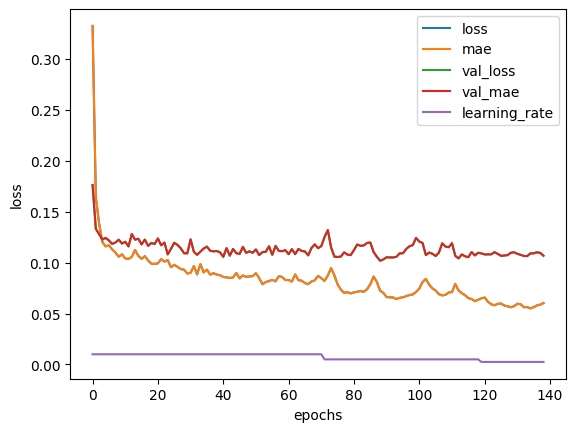

In [878]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300

In [879]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train1_nomulti_scaled = scaler.fit_transform(X_train1_nomulti)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train1_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train1_nomulti_scaled, y_train1, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4528 - mae: 0.4528 - val_loss: 0.1699 - val_mae: 0.1699 - learning_rate: 0.0100
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1604 - mae: 0.1604 - val_loss: 0.1468 - val_mae: 0.1468 - learning_rate: 0.0100
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1382 - mae: 0.1382 - val_loss: 0.1230 - val_mae: 0.1230 - learning_rate: 0.0100
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1187 - mae: 0.1187 - val_loss: 0.1217 - val_mae: 0.1217 - learning_rate: 0.0100
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1119 - mae: 0.1119 - val_loss: 0.1209 - val_mae: 0.1209 - learning_rate: 0.0100
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1066 - mae: 0.1066 - val_loss: 0.1196 - val_mae: 0.1196 - learning_rate: 0.0100
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1045 - mae: 0.1045 - val_loss: 0.1178 - val_mae: 0.1178 - learning_rate: 0.0100
Epoch 8/150
12/12 ━━━━━━

In [880]:
model.evaluate(X_test1_nomulti, y_test1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227 - mae: 0.1227 


[0.12448258697986603, 0.12448258697986603]

In [881]:
model.summary();

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

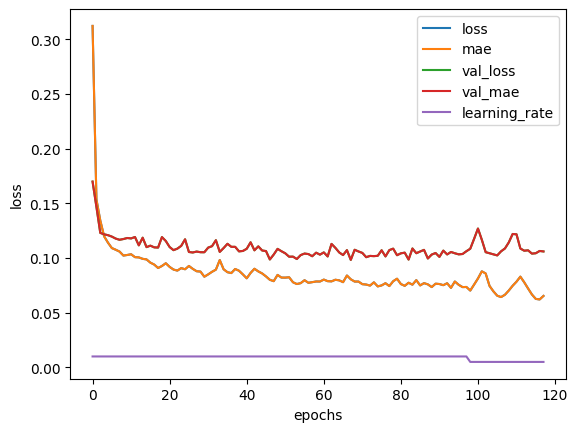

In [882]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

75-25 Train Test Split

In [883]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_nomulti_scaled = scaler.fit_transform(X_train2_nomulti)  # Assuming X_train2 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_nomulti_scaled, y_train2, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3061 - mae: 0.3061 - val_loss: 0.1459 - val_mae: 0.1459 - learning_rate: 0.0100
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1453 - mae: 0.1453 - val_loss: 0.1316 - val_mae: 0.1316 - learning_rate: 0.0100
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1259 - mae: 0.1259 - val_loss: 0.1255 - val_mae: 0.1255 - learning_rate: 0.0100
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1189 - mae: 0.1189 - val_loss: 0.1178 - val_mae: 0.1178 - learning_rate: 0.0100
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1141 - mae: 0.1141 - val_loss: 0.1142 - val_mae: 0.1142 - learning_rate: 0.0100
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1098 - mae: 0.1098 - val_loss: 0.1137 - val_mae: 0.1137 - learning_rate: 0.0100
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1036 - mae: 0.1036 - val_loss: 0.1124 - val_mae: 0.1124 - learning_rate: 0.0100
Epoch 8/100
11/11 ━━━━━━

In [884]:
model.evaluate(X_test2_nomulti, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2448 - mae: 0.2448 


[0.2460142970085144, 0.2460142970085144]

In [885]:
model.summary();

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_165 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

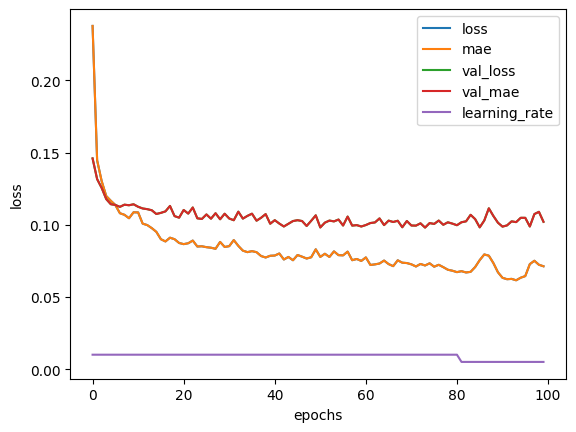

In [886]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150

In [887]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_nomulti_scaled = scaler.fit_transform(X_train2_nomulti)  # Assuming X_train2 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_nomulti_scaled, y_train2, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.4527 - mae: 0.4527 - val_loss: 0.1871 - val_mae: 0.1871 - learning_rate: 0.0100
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1611 - mae: 0.1611 - val_loss: 0.1315 - val_mae: 0.1315 - learning_rate: 0.0100
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1240 - mae: 0.1240 - val_loss: 0.1204 - val_mae: 0.1204 - learning_rate: 0.0100
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1099 - mae: 0.1099 - val_loss: 0.1220 - val_mae: 0.1220 - learning_rate: 0.0100
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1085 - mae: 0.1085 - val_loss: 0.1205 - val_mae: 0.1205 - learning_rate: 0.0100
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1070 - mae: 0.1070 - val_loss: 0.1250 - val_mae: 0.1250 - learning_rate: 0.0100
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1037 - mae: 0.1037 - val_loss: 0.1177 - val_mae: 0.1177 - learning_rate: 0.0100
Epoch 8/150
11/11 ━━━━━━

In [888]:
model.evaluate(X_test2_nomulti, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4868 - mae: 0.4868 


[0.4882683753967285, 0.4882683753967285]

In [889]:
model.summary();

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_170 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

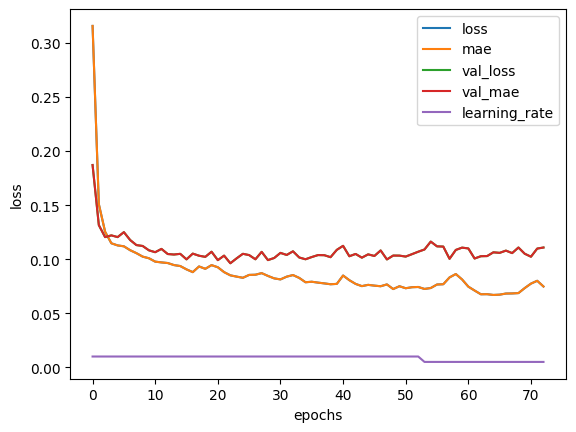

In [890]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300

In [891]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train2_nomulti_scaled = scaler.fit_transform(X_train2_nomulti)  # Assuming X_train2 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train2_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train2_nomulti_scaled, y_train2, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.4591 - mae: 0.4591 - val_loss: 0.2190 - val_mae: 0.2190 - learning_rate: 0.0100
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1940 - mae: 0.1940 - val_loss: 0.1404 - val_mae: 0.1404 - learning_rate: 0.0100
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1351 - mae: 0.1351 - val_loss: 0.1313 - val_mae: 0.1313 - learning_rate: 0.0100
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1228 - mae: 0.1228 - val_loss: 0.1228 - val_mae: 0.1228 - learning_rate: 0.0100
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1141 - mae: 0.1141 - val_loss: 0.1183 - val_mae: 0.1183 - learning_rate: 0.0100
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 - mae: 0.1089 - val_loss: 0.1194 - val_mae: 0.1194 - learning_rate: 0.0100
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1071 - mae: 0.1071 - val_loss: 0.1166 - val_mae: 0.1166 - learning_rate: 0.0100
Epoch 8/300
11/11 ━━━━━━

In [892]:
model.evaluate(X_test2_nomulti, y_test2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315 - mae: 0.1315 


[0.14082765579223633, 0.14082765579223633]

In [893]:
model.summary();

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_175 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

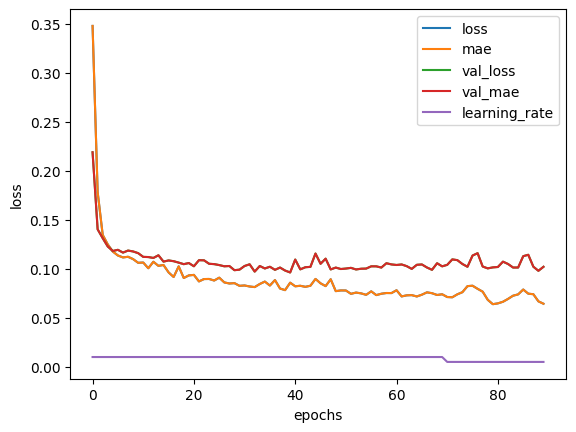

In [894]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

70-30 Train Test Split

EPOCHS = 100

In [895]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_nomulti_scaled = scaler.fit_transform(X_train3_nomulti)  # Assuming X_train1 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_nomulti_scaled, y_train3, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4638 - mae: 0.4638 - val_loss: 0.1781 - val_mae: 0.1781 - learning_rate: 0.0100
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1818 - mae: 0.1818 - val_loss: 0.1329 - val_mae: 0.1329 - learning_rate: 0.0100
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1463 - mae: 0.1463 - val_loss: 0.1282 - val_mae: 0.1282 - learning_rate: 0.0100
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1273 - mae: 0.1273 - val_loss: 0.1219 - val_mae: 0.1219 - learning_rate: 0.0100
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1217 - mae: 0.1217 - val_loss: 0.1170 - val_mae: 0.1170 - learning_rate: 0.0100
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1150 - mae: 0.1150 - val_loss: 0.1136 - val_mae: 0.1136 - learning_rate: 0.0100
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1115 - mae: 0.1115 - val_loss: 0.1114 - val_mae: 0.1114 - learning_rate: 0.0100
Epoch 8/100
10/10 ━━━━━━

In [896]:
model.evaluate(X_test3_nomulti, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1668 - mae: 1.1668 


[1.1752756834030151, 1.1752756834030151]

In [897]:
model.summary();

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

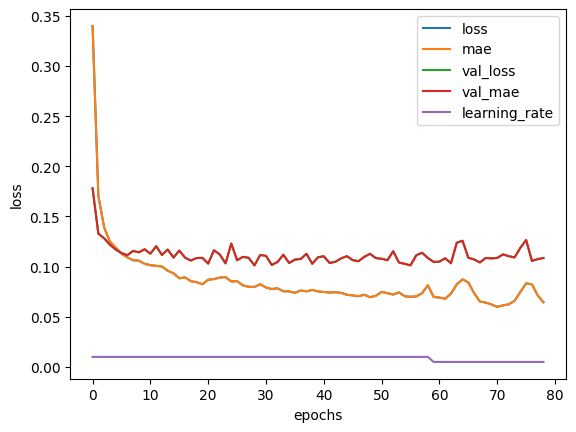

In [898]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150

In [899]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_nomulti_scaled = scaler.fit_transform(X_train3_nomulti)  # Assuming X_train3 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])
# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_nomulti_scaled, y_train3, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2489 - mae: 0.2489 - val_loss: 0.1447 - val_mae: 0.1447 - learning_rate: 0.0100
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1349 - mae: 0.1349 - val_loss: 0.1308 - val_mae: 0.1308 - learning_rate: 0.0100
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1235 - mae: 0.1235 - val_loss: 0.1334 - val_mae: 0.1334 - learning_rate: 0.0100
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.1289 - val_mae: 0.1289 - learning_rate: 0.0100
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1172 - mae: 0.1172 - val_loss: 0.1248 - val_mae: 0.1248 - learning_rate: 0.0100
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1112 - mae: 0.1112 - val_loss: 0.1264 - val_mae: 0.1264 - learning_rate: 0.0100
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1090 - mae: 0.1090 - val_loss: 0.1198 - val_mae: 0.1198 - learning_rate: 0.0100
Epoch 8/150

In [900]:
model.evaluate(X_test3_nomulti, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1333 - mae: 0.1333 


[0.13643331825733185, 0.13643331825733185]

In [901]:
model.summary();

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

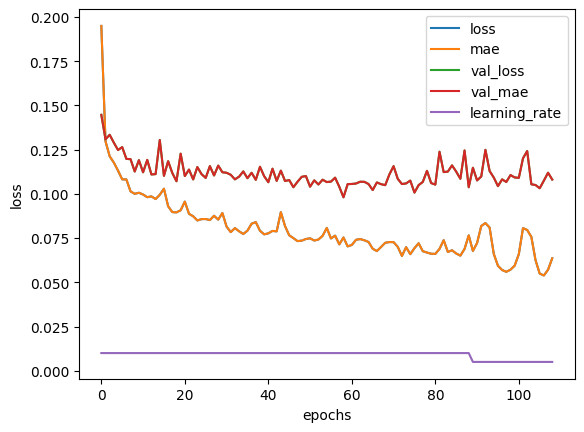

In [902]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300

In [903]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train3_nomulti_scaled = scaler.fit_transform(X_train3_nomulti)  # Assuming X_train3 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train3_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train3_nomulti_scaled, y_train3, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3369 - mae: 0.3369 - val_loss: 0.1698 - val_mae: 0.1698 - learning_rate: 0.0100
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1574 - mae: 0.1574 - val_loss: 0.1281 - val_mae: 0.1281 - learning_rate: 0.0100
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1242 - mae: 0.1242 - val_loss: 0.1188 - val_mae: 0.1188 - learning_rate: 0.0100
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1167 - mae: 0.1167 - val_loss: 0.1226 - val_mae: 0.1226 - learning_rate: 0.0100
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1147 - mae: 0.1147 - val_loss: 0.1196 - val_mae: 0.1196 - learning_rate: 0.0100
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1084 - mae: 0.1084 - val_loss: 0.1158 - val_mae: 0.1158 - learning_rate: 0.0100
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1030 - mae: 0.1030 - val_loss: 0.1144 - val_mae: 0.1144 - learning_rate: 0.0100
Epoch 8/300
10/10 ━━━━━━

In [904]:
model.evaluate(X_test3_nomulti, y_test3)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8532 - mae: 0.8532 


[0.8572787642478943, 0.8572787642478943]

In [905]:
model.summary();

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_190 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

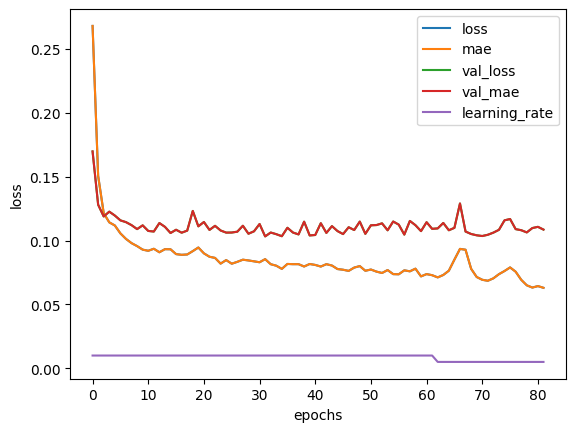

In [906]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

60-40 Train Test Split

EPOCHS = 100

In [907]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_nomulti_scaled = scaler.fit_transform(X_train4_nomulti)  # Assuming X_train4 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_nomulti_scaled, y_train4, epochs=100, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.5210 - mae: 0.5210 - val_loss: 0.1501 - val_mae: 0.1501 - learning_rate: 0.0100
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.1297 - val_mae: 0.1297 - learning_rate: 0.0100
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1226 - mae: 0.1226 - val_loss: 0.1267 - val_mae: 0.1267 - learning_rate: 0.0100
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1217 - mae: 0.1217 - val_loss: 0.1203 - val_mae: 0.1203 - learning_rate: 0.0100
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1165 - mae: 0.1165 - val_loss: 0.1190 - val_mae: 0.1190 - learning_rate: 0.0100
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1123 - mae: 0.1123 - val_loss: 0.1193 - val_mae: 0.1193 - learning_rate: 0.0100
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1107 - mae: 0.1107 - val_loss: 0.1175 - val_mae: 0.1175 - learning_rate: 0.0100
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

In [908]:
model.evaluate(X_test4_nomulti, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1283 - mae: 0.1283 


[0.13069382309913635, 0.13069382309913635]

In [909]:
model.summary();

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_195 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

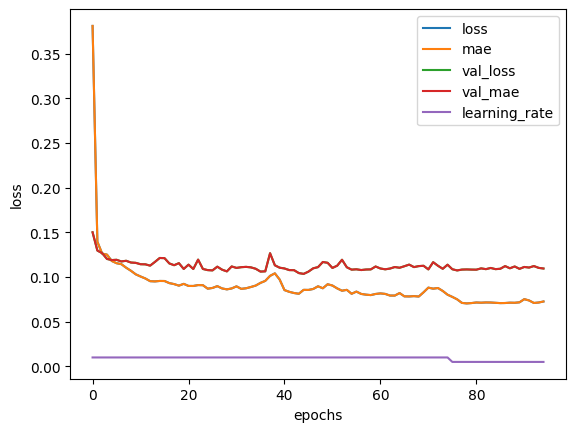

In [910]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=150

In [911]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_nomulti_scaled = scaler.fit_transform(X_train4_nomulti)  # Assuming X_train4 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_nomulti_scaled, y_train4, epochs=150, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.7745 - mae: 0.7745 - val_loss: 0.2062 - val_mae: 0.2062 - learning_rate: 0.0100
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1732 - mae: 0.1732 - val_loss: 0.1398 - val_mae: 0.1398 - learning_rate: 0.0100
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1429 - mae: 0.1429 - val_loss: 0.1432 - val_mae: 0.1432 - learning_rate: 0.0100
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1317 - mae: 0.1317 - val_loss: 0.1258 - val_mae: 0.1258 - learning_rate: 0.0100
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1182 - mae: 0.1182 - val_loss: 0.1303 - val_mae: 0.1303 - learning_rate: 0.0100
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1154 - mae: 0.1154 - val_loss: 0.1267 - val_mae: 0.1267 - learning_rate: 0.0100
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1127 - mae: 0.1127 - val_loss: 0.1295 - val_mae: 0.1295 - learning_rate: 0.0100
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━

In [912]:
model.evaluate(X_test4_nomulti, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1970 - mae: 0.1970 


[0.19725410640239716, 0.19725410640239716]

In [913]:
model.summary();

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_200 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

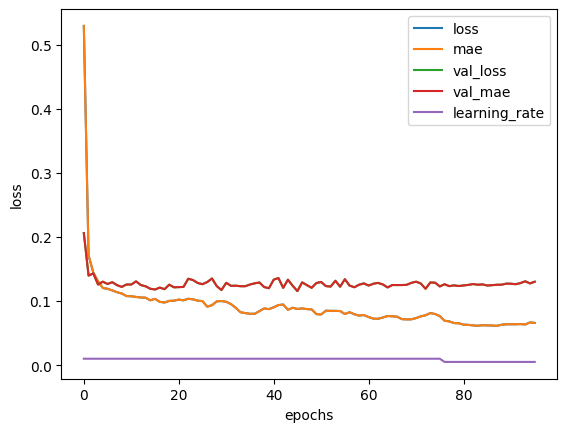

In [914]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Epochs=300

In [915]:
# STEP 1: Data Preprocessing - Normalize the input data
scaler = StandardScaler()
X_train4_nomulti_scaled = scaler.fit_transform(X_train4_nomulti)  # Assuming X_train4 is a NumPy array

# STEP 2: Updated Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=(X_train4_nomulti_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(18, activation="relu"),
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="linear")  # No activation for regression
])

# STEP 3: Compile the model with a lower learning rate and optimizer tuning
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Decreased learning rate
              metrics=["mae"])

# STEP 4: Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=30, verbose=1)

# STEP 5: Fit the model with callbacks
history = model.fit(X_train4_nomulti_scaled, y_train4, epochs=300, batch_size=68, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.3849 - mae: 0.3849 - val_loss: 0.1658 - val_mae: 0.1658 - learning_rate: 0.0100
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1562 - mae: 0.1562 - val_loss: 0.1483 - val_mae: 0.1483 - learning_rate: 0.0100
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1404 - mae: 0.1404 - val_loss: 0.1385 - val_mae: 0.1385 - learning_rate: 0.0100
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1268 - mae: 0.1268 - val_loss: 0.1271 - val_mae: 0.1271 - learning_rate: 0.0100
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1186 - mae: 0.1186 - val_loss: 0.1259 - val_mae: 0.1259 - learning_rate: 0.0100
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1103 - mae: 0.1103 - val_loss: 0.1314 - val_mae: 0.1314 - learning_rate: 0.0100
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1055 - mae: 0.1055 - val_loss: 0.1378 - val_mae: 0.1378 - learning_rate: 0.0100
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

In [916]:
model.evaluate(X_test4_nomulti, y_test4)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6114 - mae: 0.6114 


[0.6150846481323242, 0.6150846481323242]

In [917]:
model.summary();

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_205 (Dense)                    │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 18)                  │             378 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,649 (18.16 KB)

 Trainable params: 1,549 (6.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,100 (12.11 KB)

Text(0.5, 0, 'epochs')

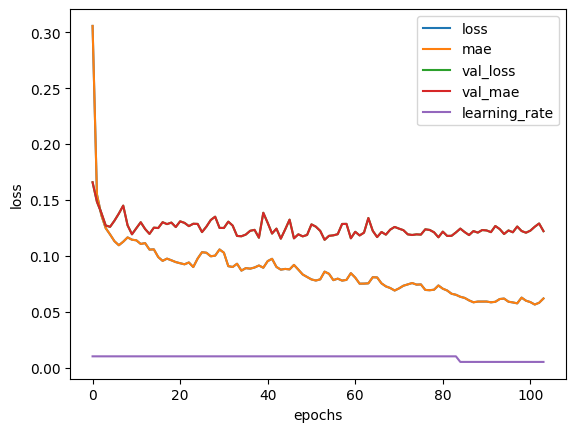

In [918]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")